# Wavelets

In [71]:
from sklearn import preprocessing
import pandas as pd
from pathlib import Path
import pywt
from skimage.restoration import denoise_wavelet
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
sns.set_theme()
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

In [51]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    ym = np.median(yyy)
    plt.plot(np.linspace(0, 1., num=len(yyy)), yyy-ym, **kwargs)


def reconstruction_stem(yyy, xmax, **kwargs):
    """Plot coefficient vector on x [0,1] independently of amount of values it contains."""
    ymax = yyy.max()
    plt.stem(np.linspace(0, 1., num=len(yyy)), yyy*(xmax/ymax), **kwargs)


In [52]:
fpath = Path("/home/mst/projects/flyps/myalyce/data/Unfiltered PPG, plus accelerometer/PPG_JoshuaBrewster2023-06-14T15_48_32.828(UTC-07_00).csv")

In [53]:
df = pd.read_csv(fpath)

In [54]:
df

,timestamp,localized,red,ir
0,1686782913042,2023-06-14T15:48:33.042(UTC-07:00),26462,44429
1,1686782913041,2023-06-14T15:48:33.041(UTC-07:00),26465,44426
2,1686782913040,2023-06-14T15:48:33.040(UTC-07:00),26458,44411
3,1686782913039,2023-06-14T15:48:33.039(UTC-07:00),26457,44406
4,1686782913037,2023-06-14T15:48:33.037(UTC-07:00),26457,44407
...,...,...,...,...
2555,1686782963623,2023-06-14T15:49:23.623(UTC-07:00),26601,44406
2556,1686782963643,2023-06-14T15:49:23.643(UTC-07:00),26601,44401
2557,1686782963663,2023-06-14T15:49:23.663(UTC-07:00),26601,44391
2558,1686782963683,2023-06-14T15:49:23.683(UTC-07:00),26587,44348


In [55]:
melted = pd.melt(df, id_vars=['timestamp'], value_vars=['red','ir'])

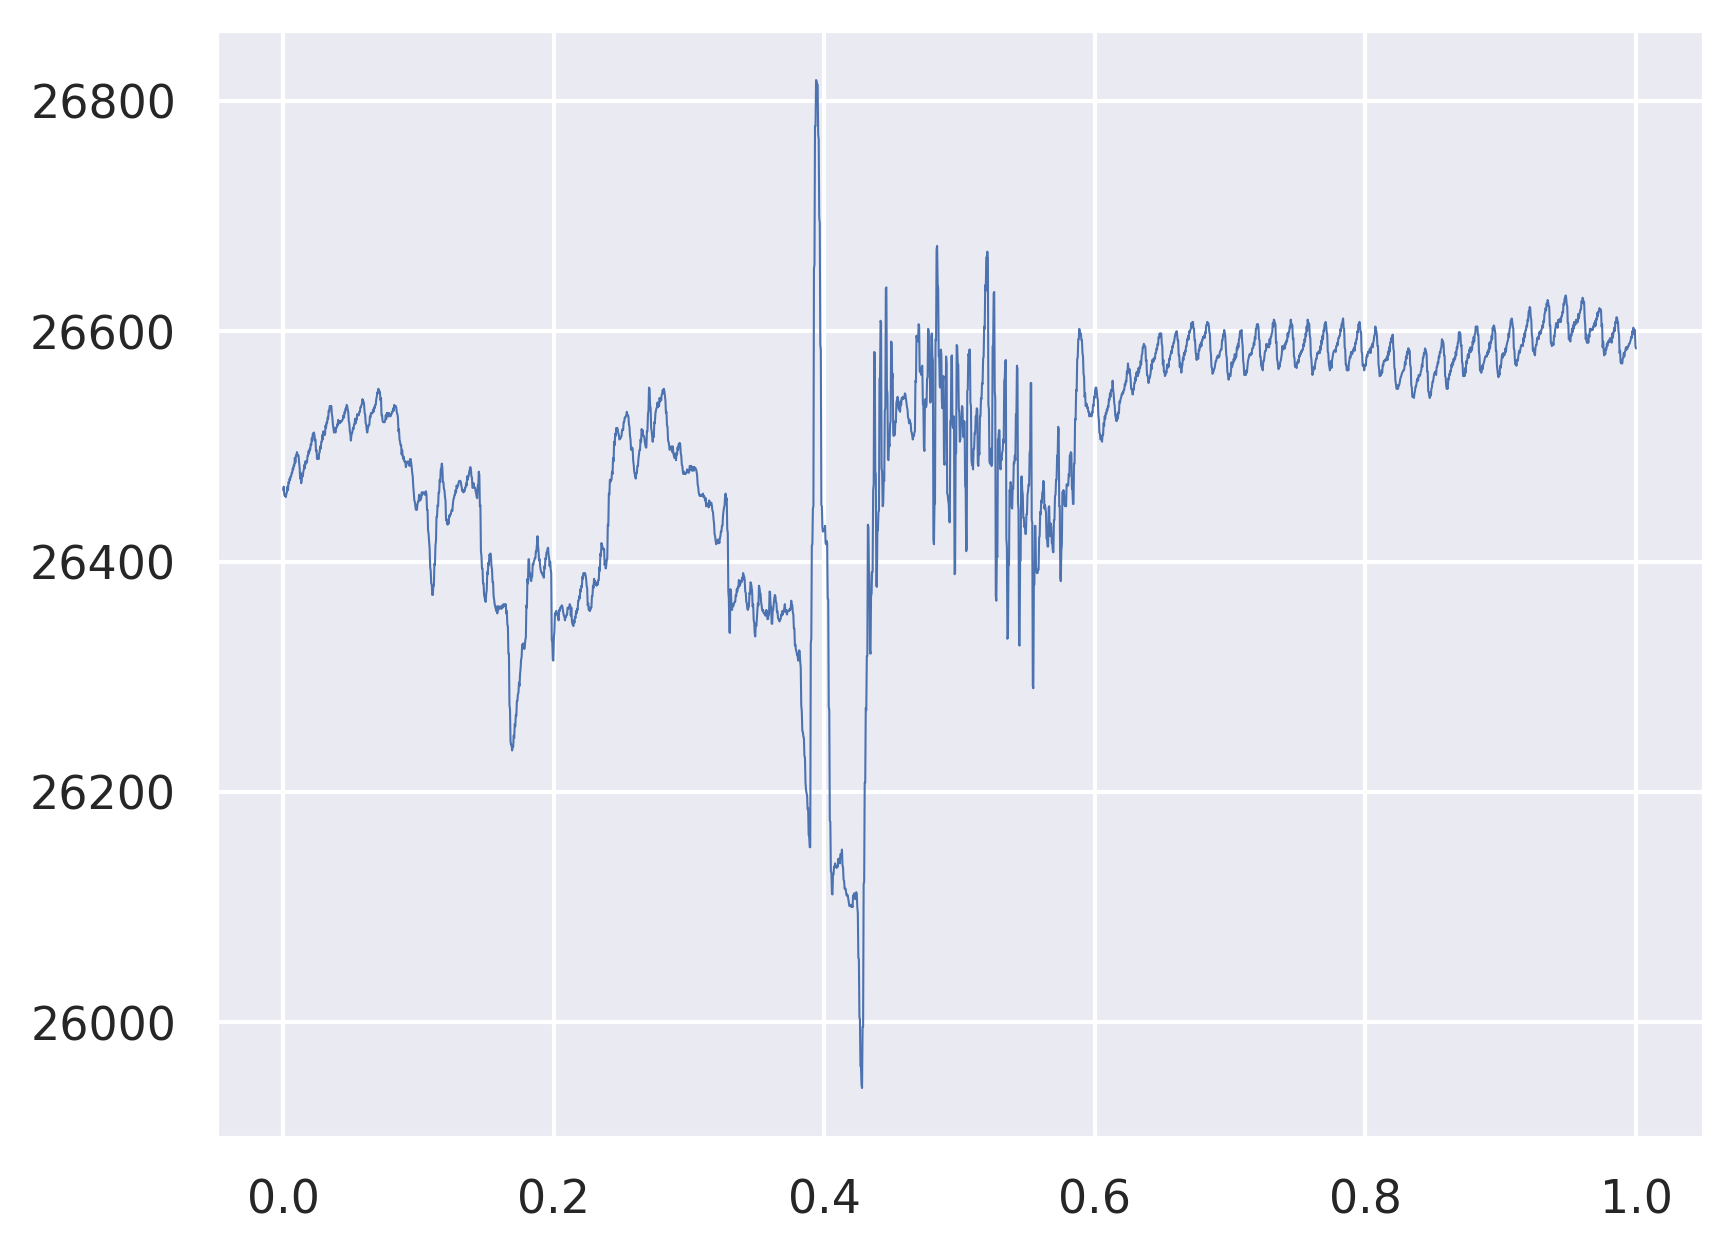

In [56]:
plt.plot(np.linspace(0, 1., num=len(df['red'])), df['red'], lw=0.5)

In [57]:
y_denoise = denoise_wavelet(df['red'], method='VisuShrink', mode='soft', wavelet_levels=1, wavelet='sym8', rescale_sigma='True')
x_denoise = np.linspace(0,1,len(y_denoise))

In [58]:
data = df['red']
w = pywt.Wavelet('sym4')
maxlev = pywt.dwt_max_level(len(data), w.dec_len)
threshold = 0.04
coeffs = pywt.wavedec(data, 'sym4', level=maxlev)


In [59]:
for i in range(1, len(coeffs)):
    coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))

datarec = pywt.waverec(coeffs, 'sym4')

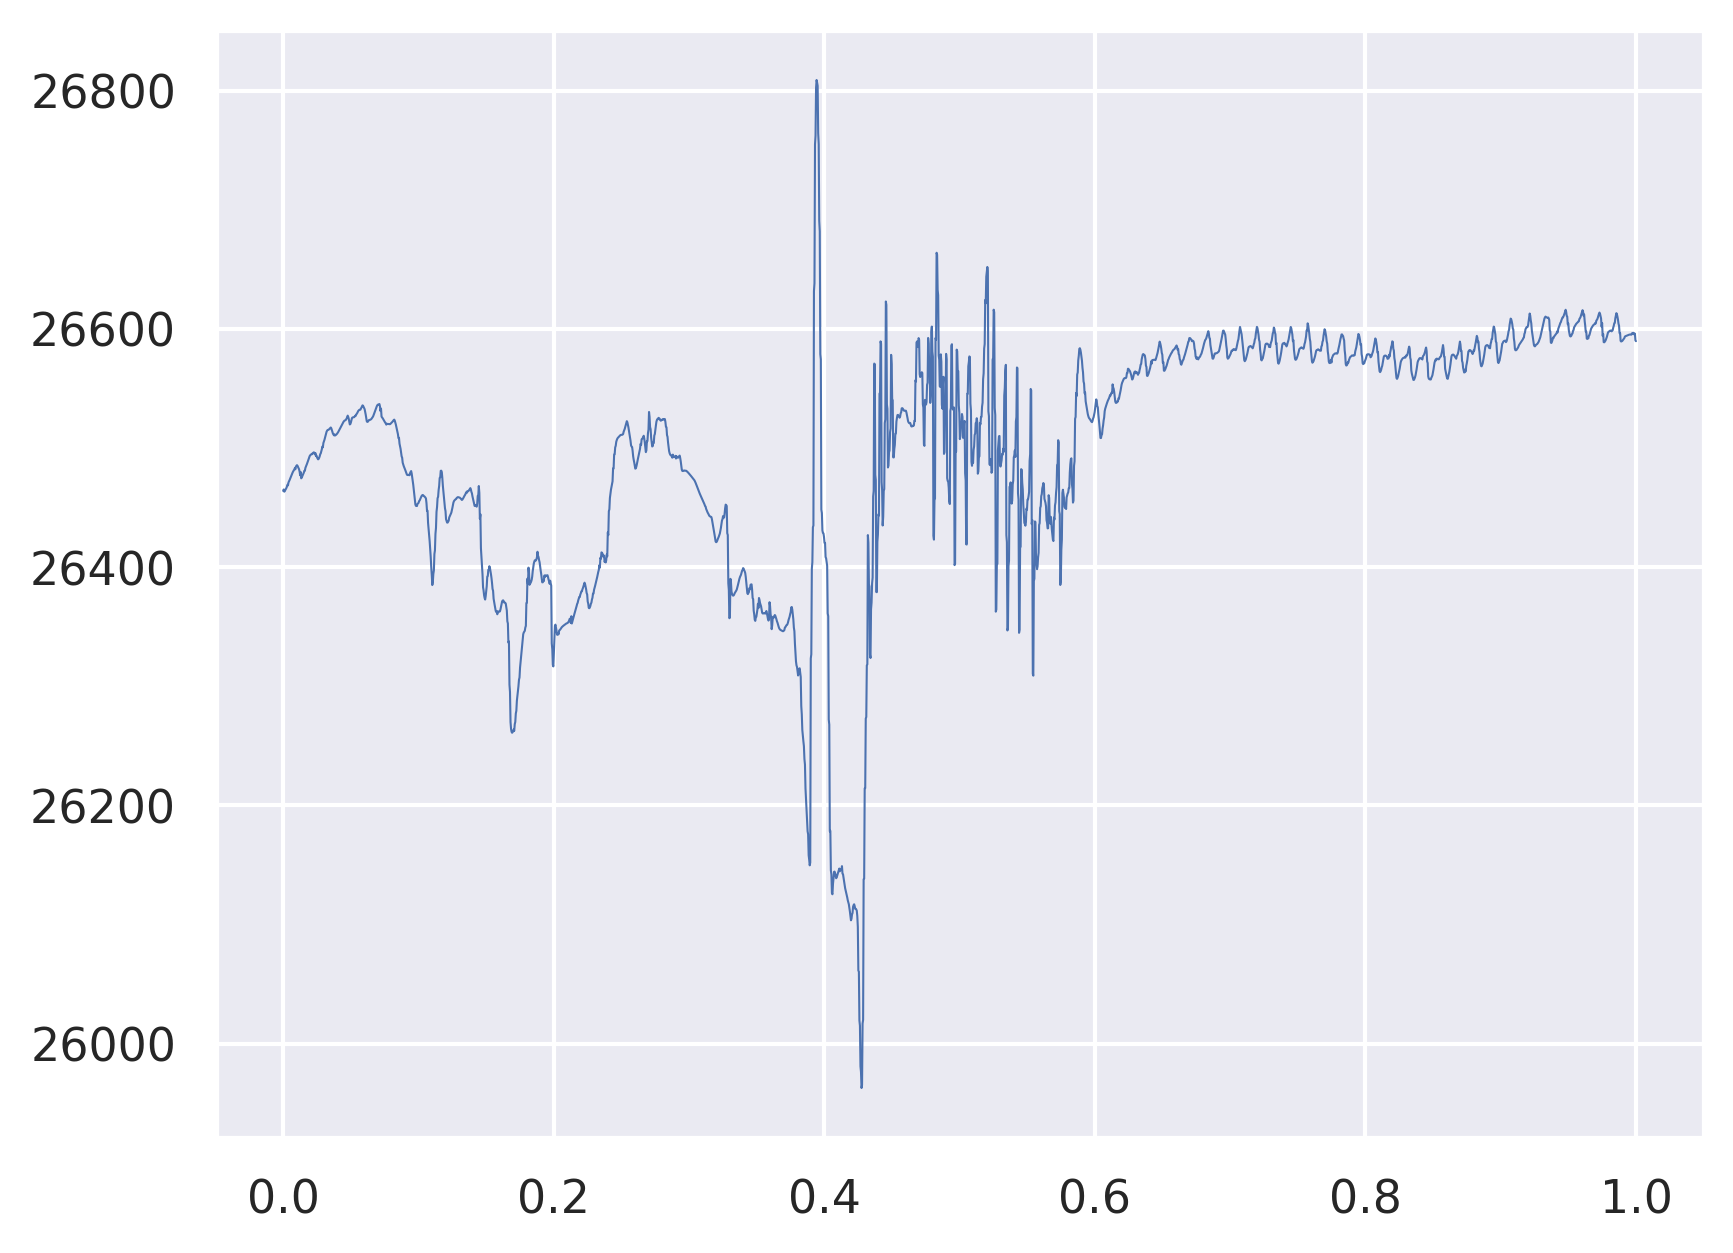

In [60]:
plt.plot(np.linspace(0, 1., num=len(datarec)), datarec, lw=0.5)

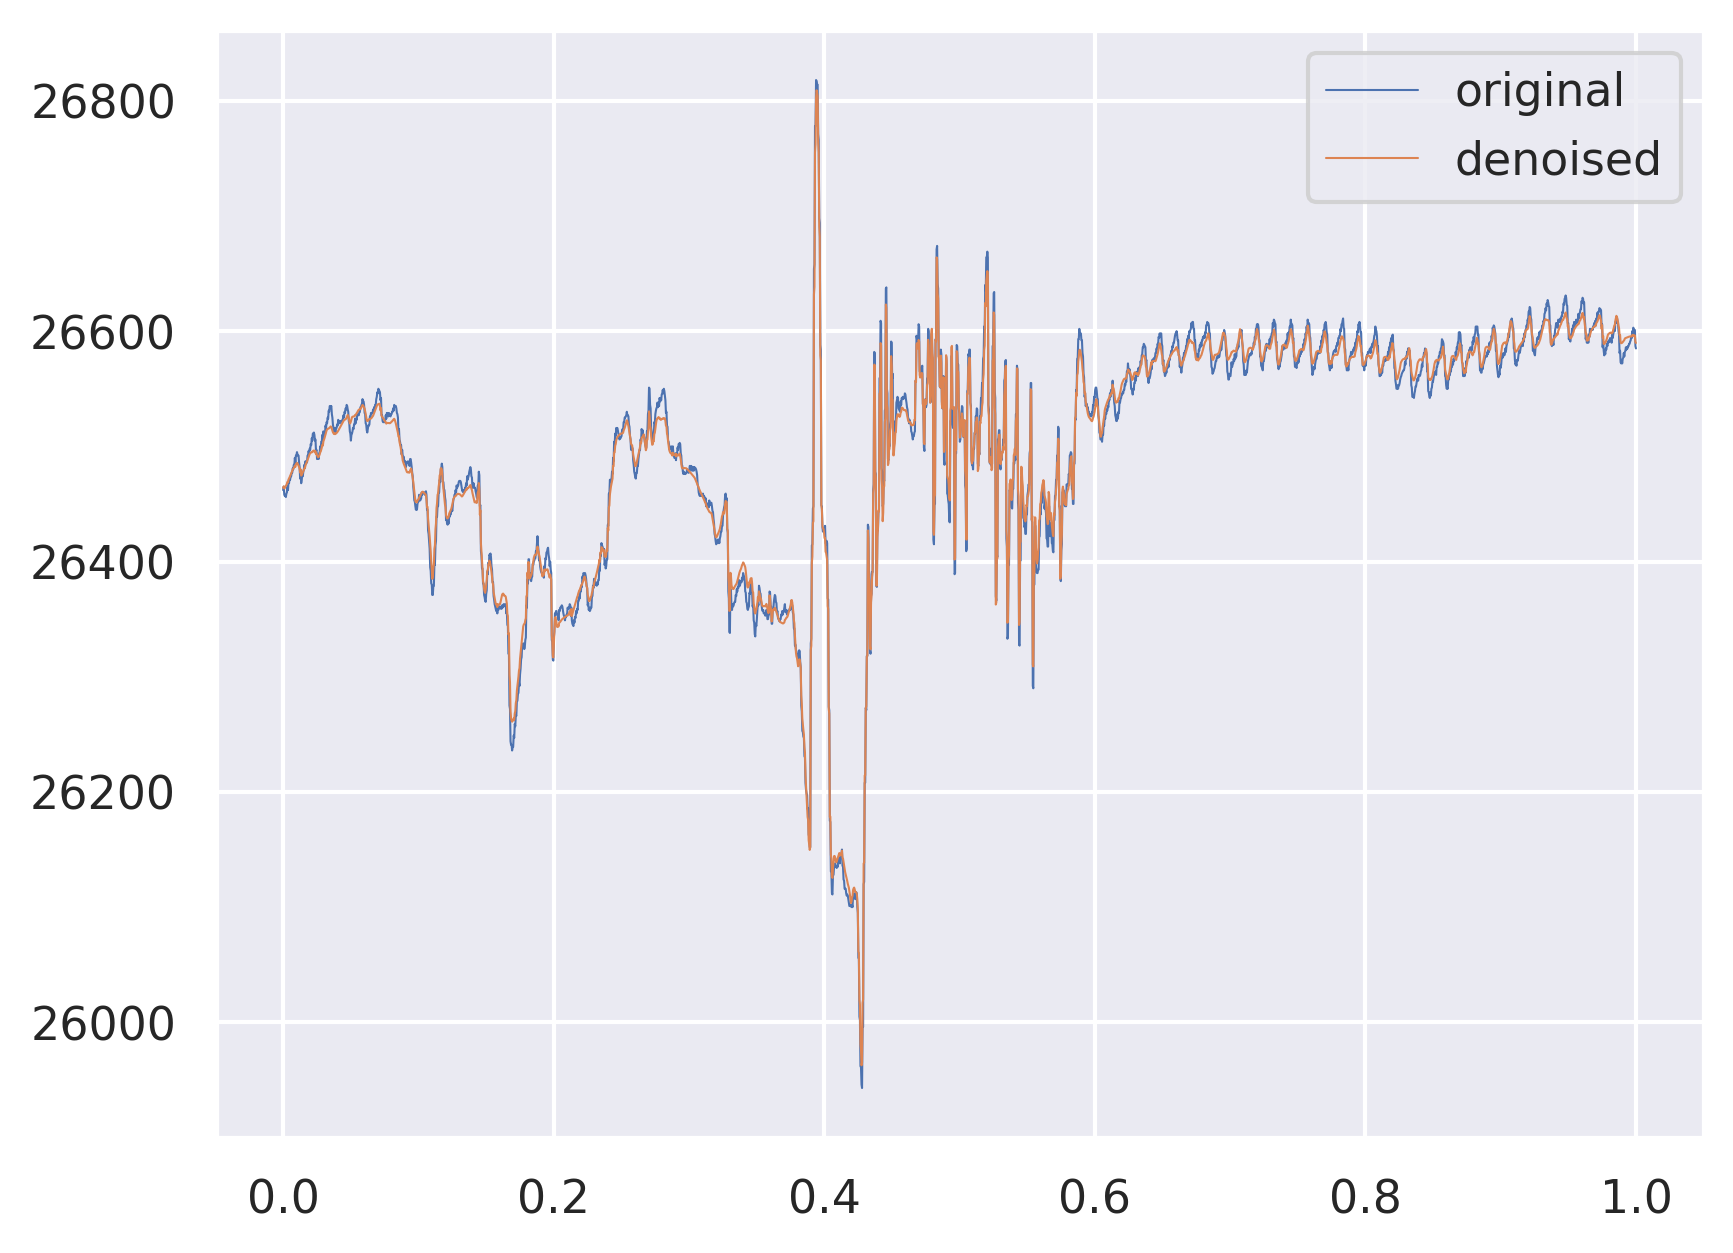

In [61]:
plt.figure()
plt.plot(np.linspace(0, 1., num=len(df['red'])), df['red'], lw=0.5)
plt.plot(np.linspace(0, 1., num=len(datarec)), datarec, lw=0.5)
plt.legend(['original', 'denoised'])

In [62]:
len(coeffs)

9

In [75]:
rec2

array([[0.71939445],
       [0.72102644],
       [0.71785574],
       ...,
       [0.92667974],
       [0.91787675],
       [0.91687466]])

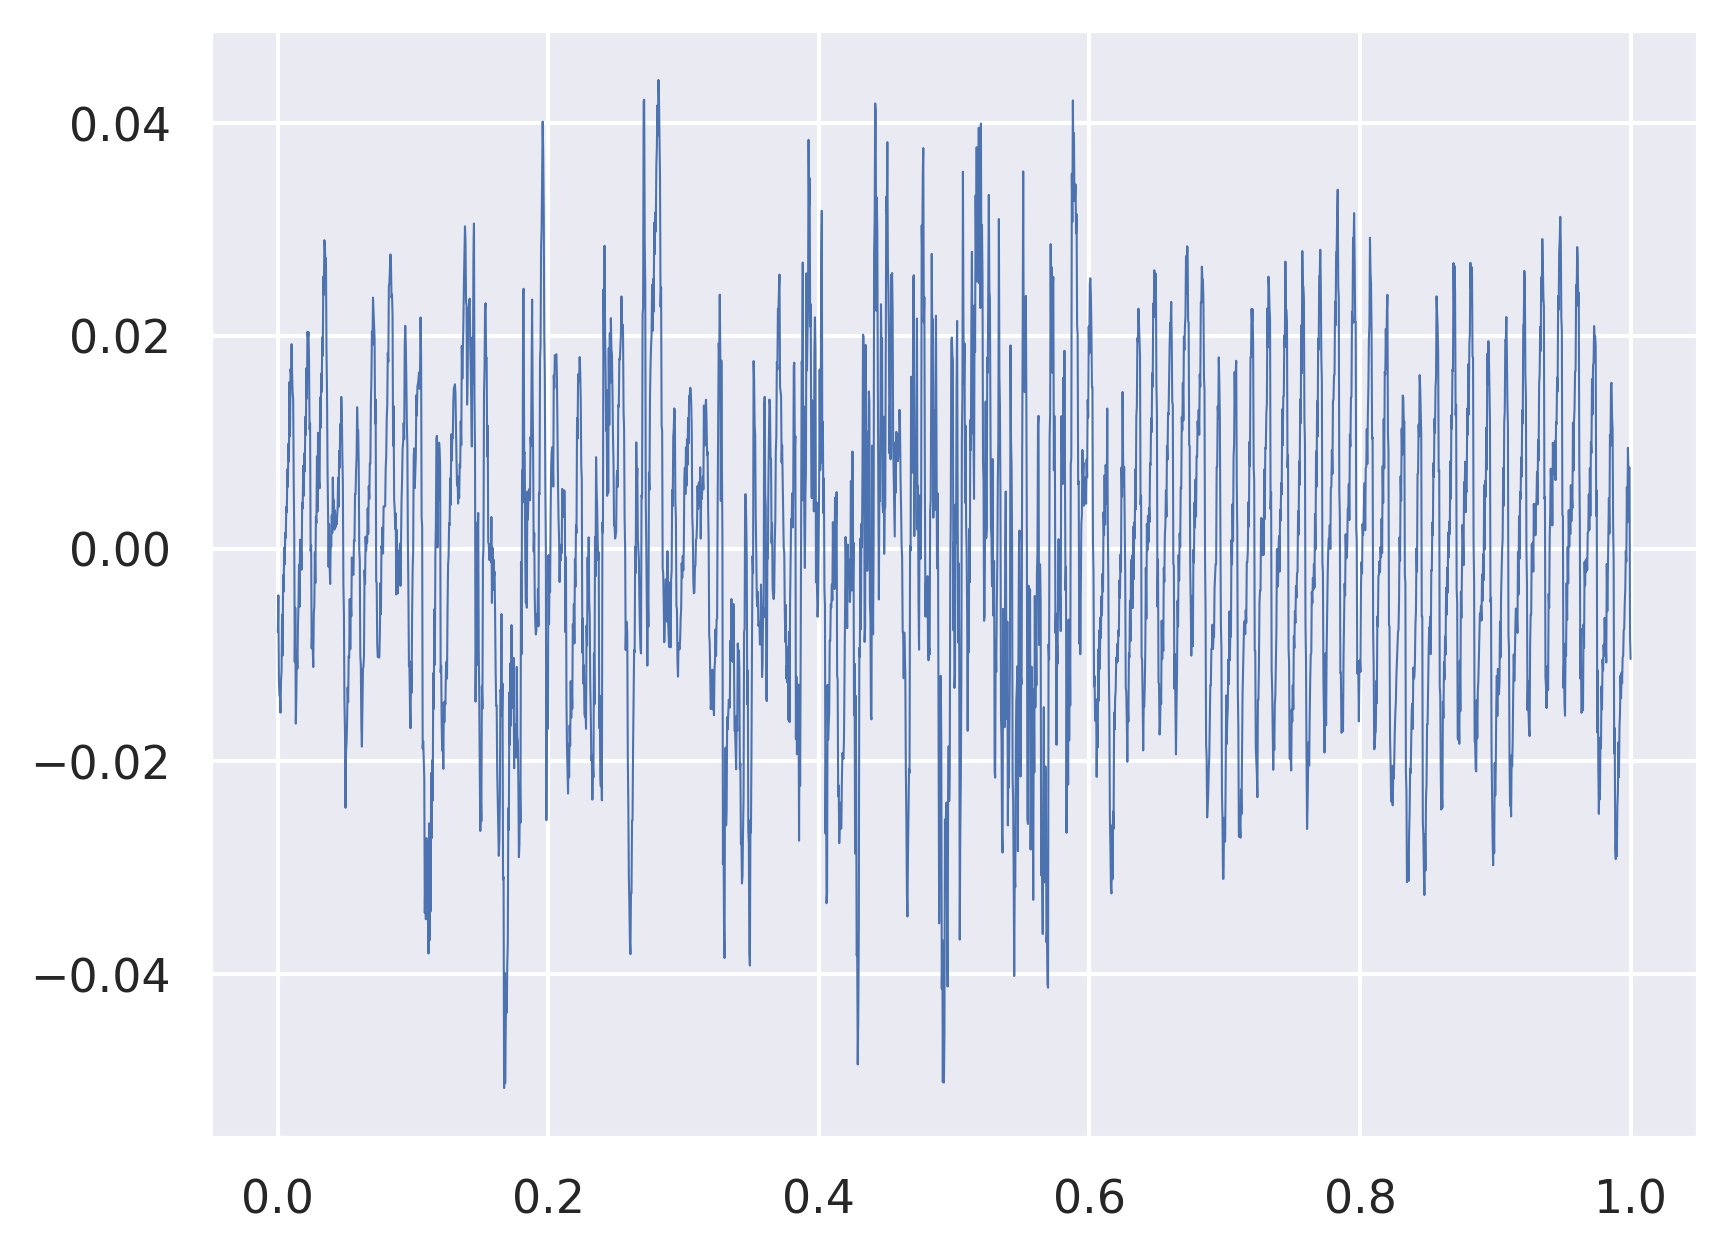

In [138]:
cfs = coeffs.copy()

for i in range(3, len(cfs)):
        # print(max(coeffs[i]))
        cfs[i] = pywt.threshold(cfs[i], 0.1*np.max(cfs[i]), 'garrote')

rec2 = pywt.waverec(cfs, 'sym4')
rec2 = min_max_scaler.transform((rec2.reshape(-1, 1)))
plt.plot(np.linspace(0, 1., num=len(red)), red-rec2, lw=0.5)

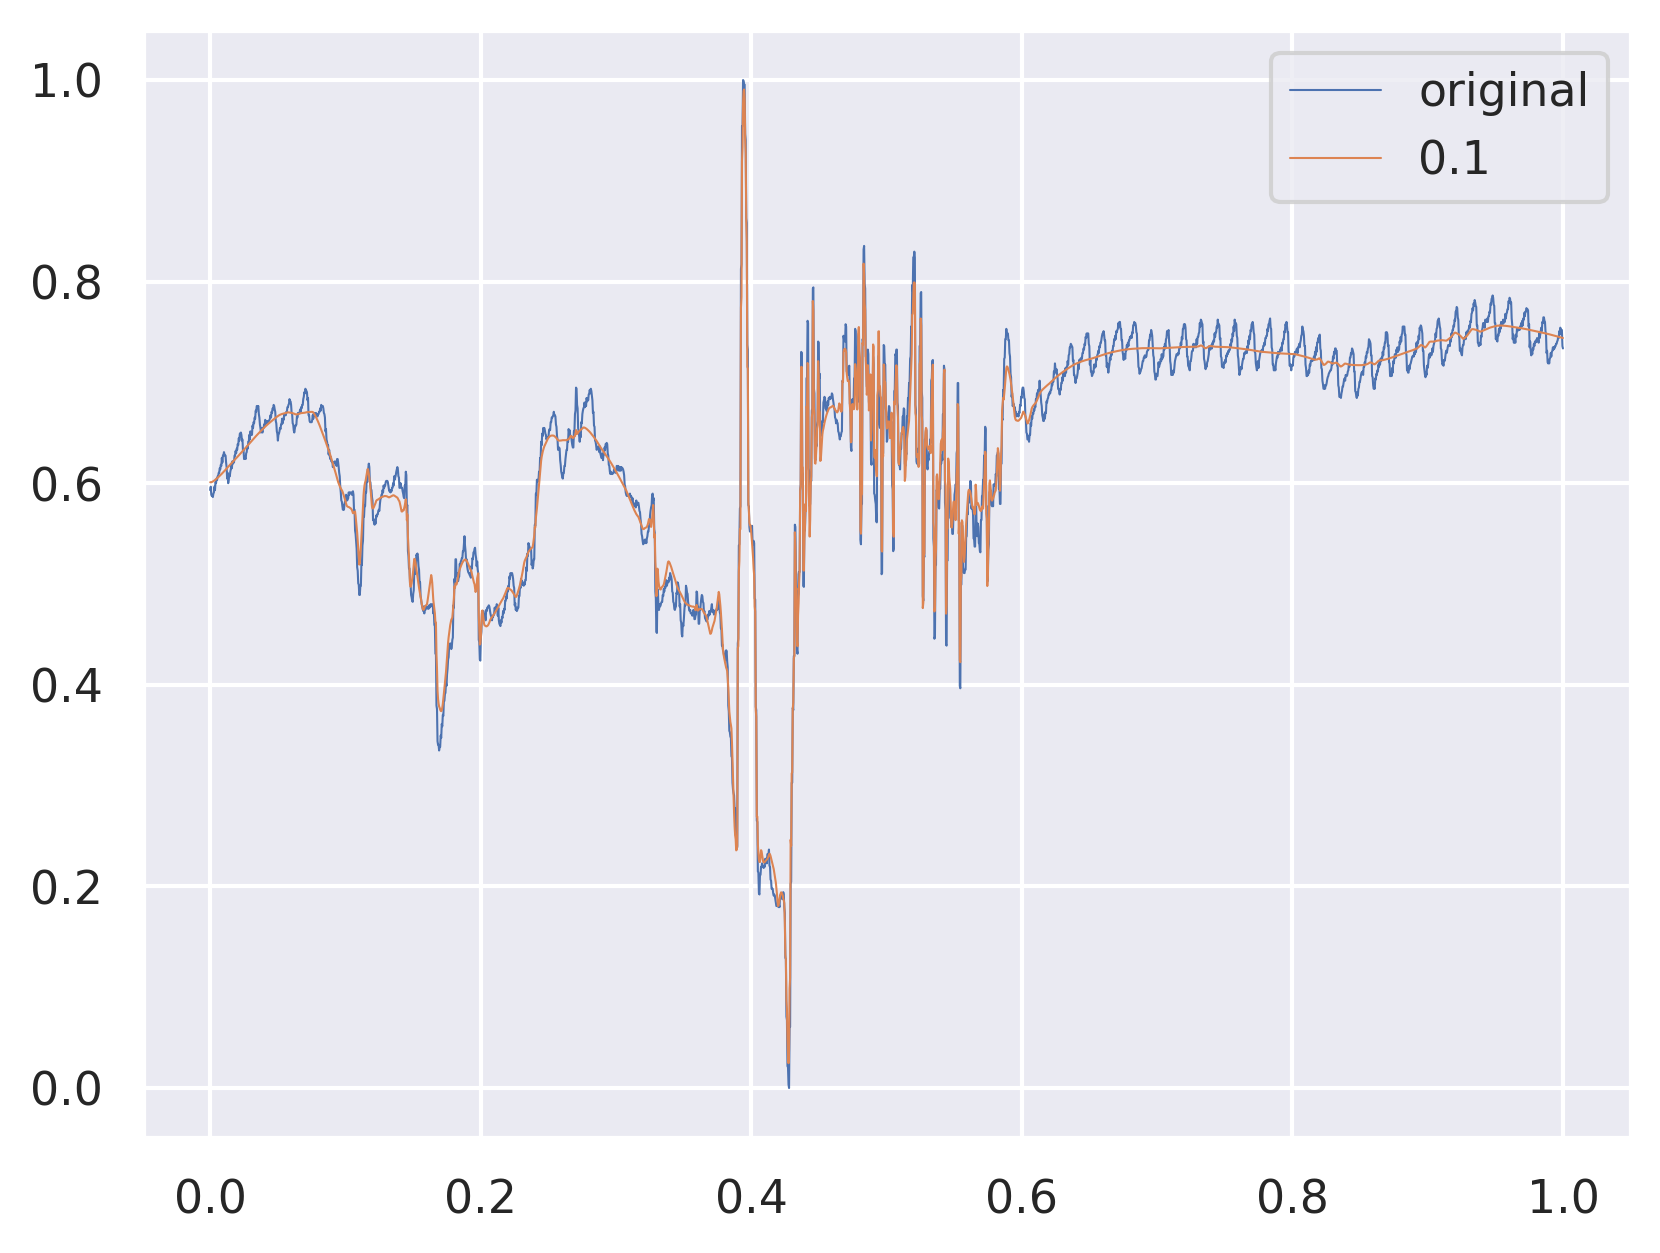

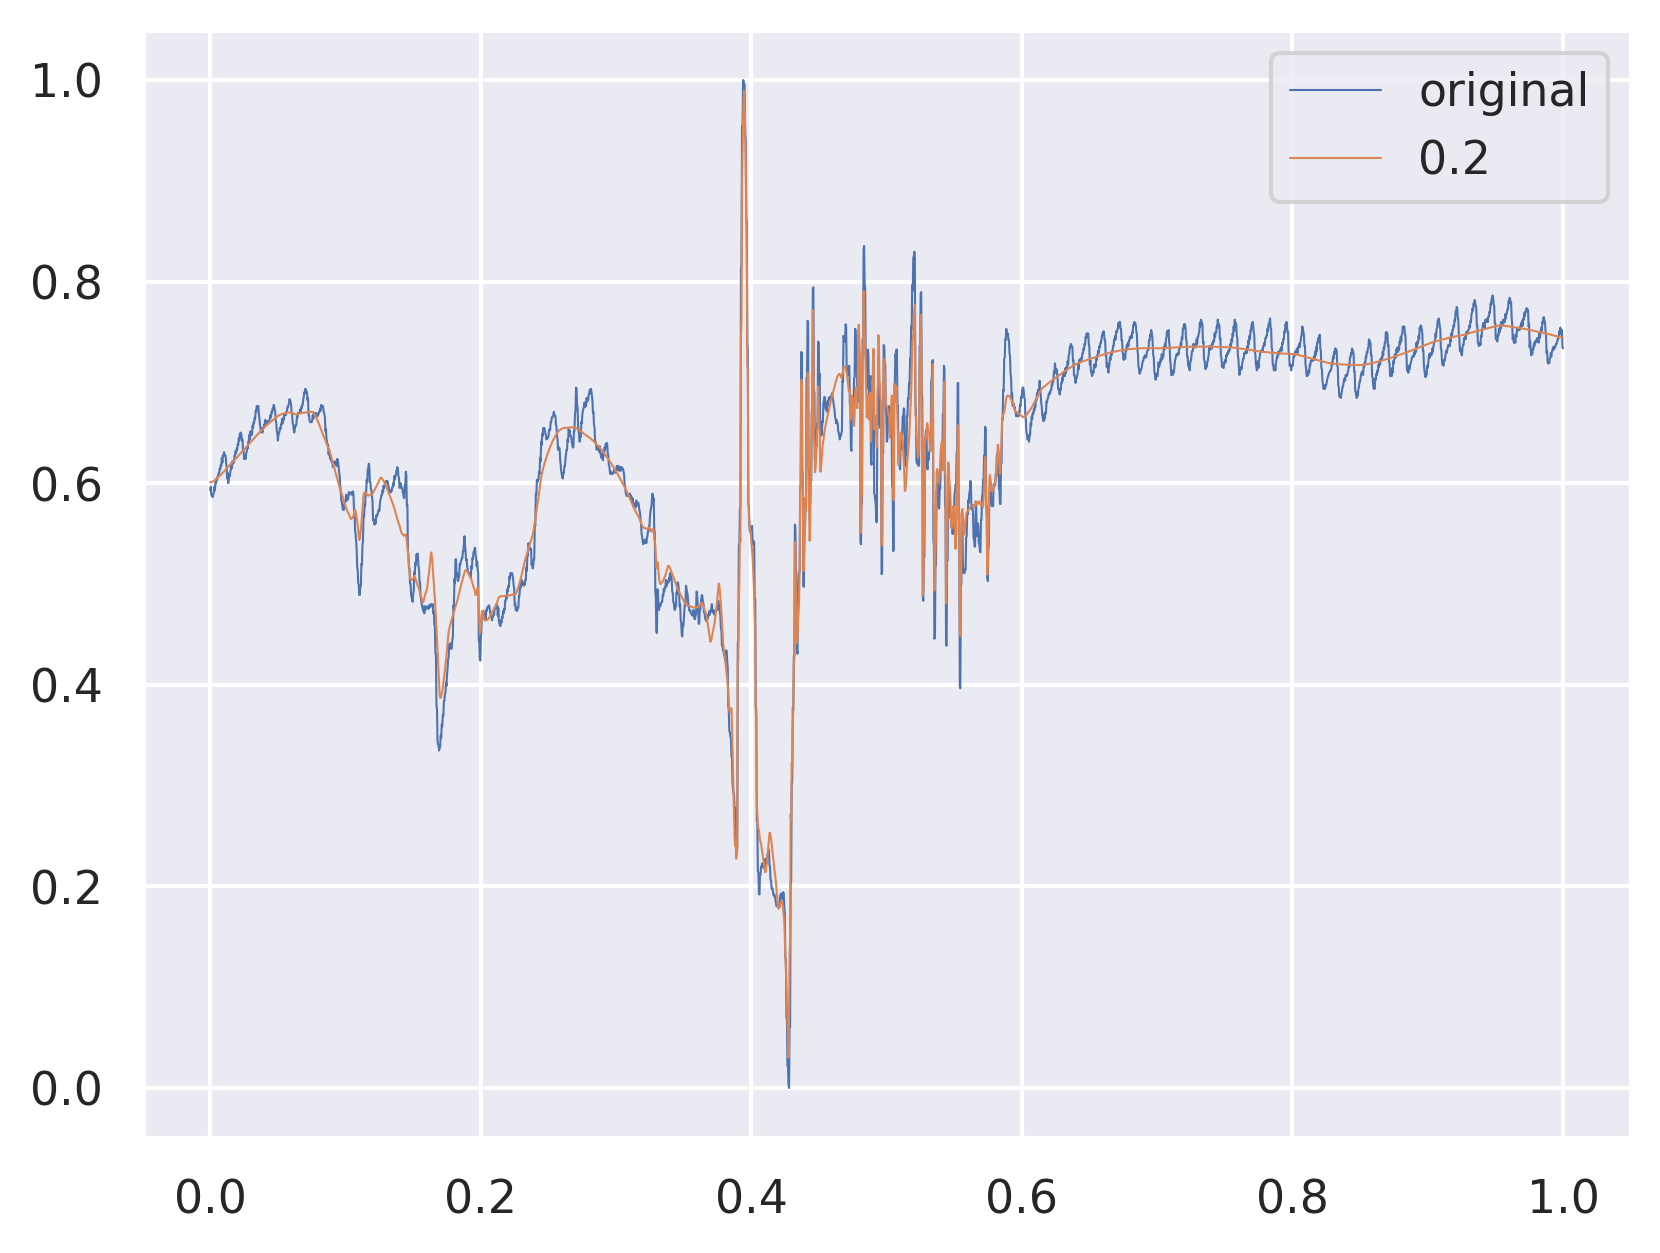

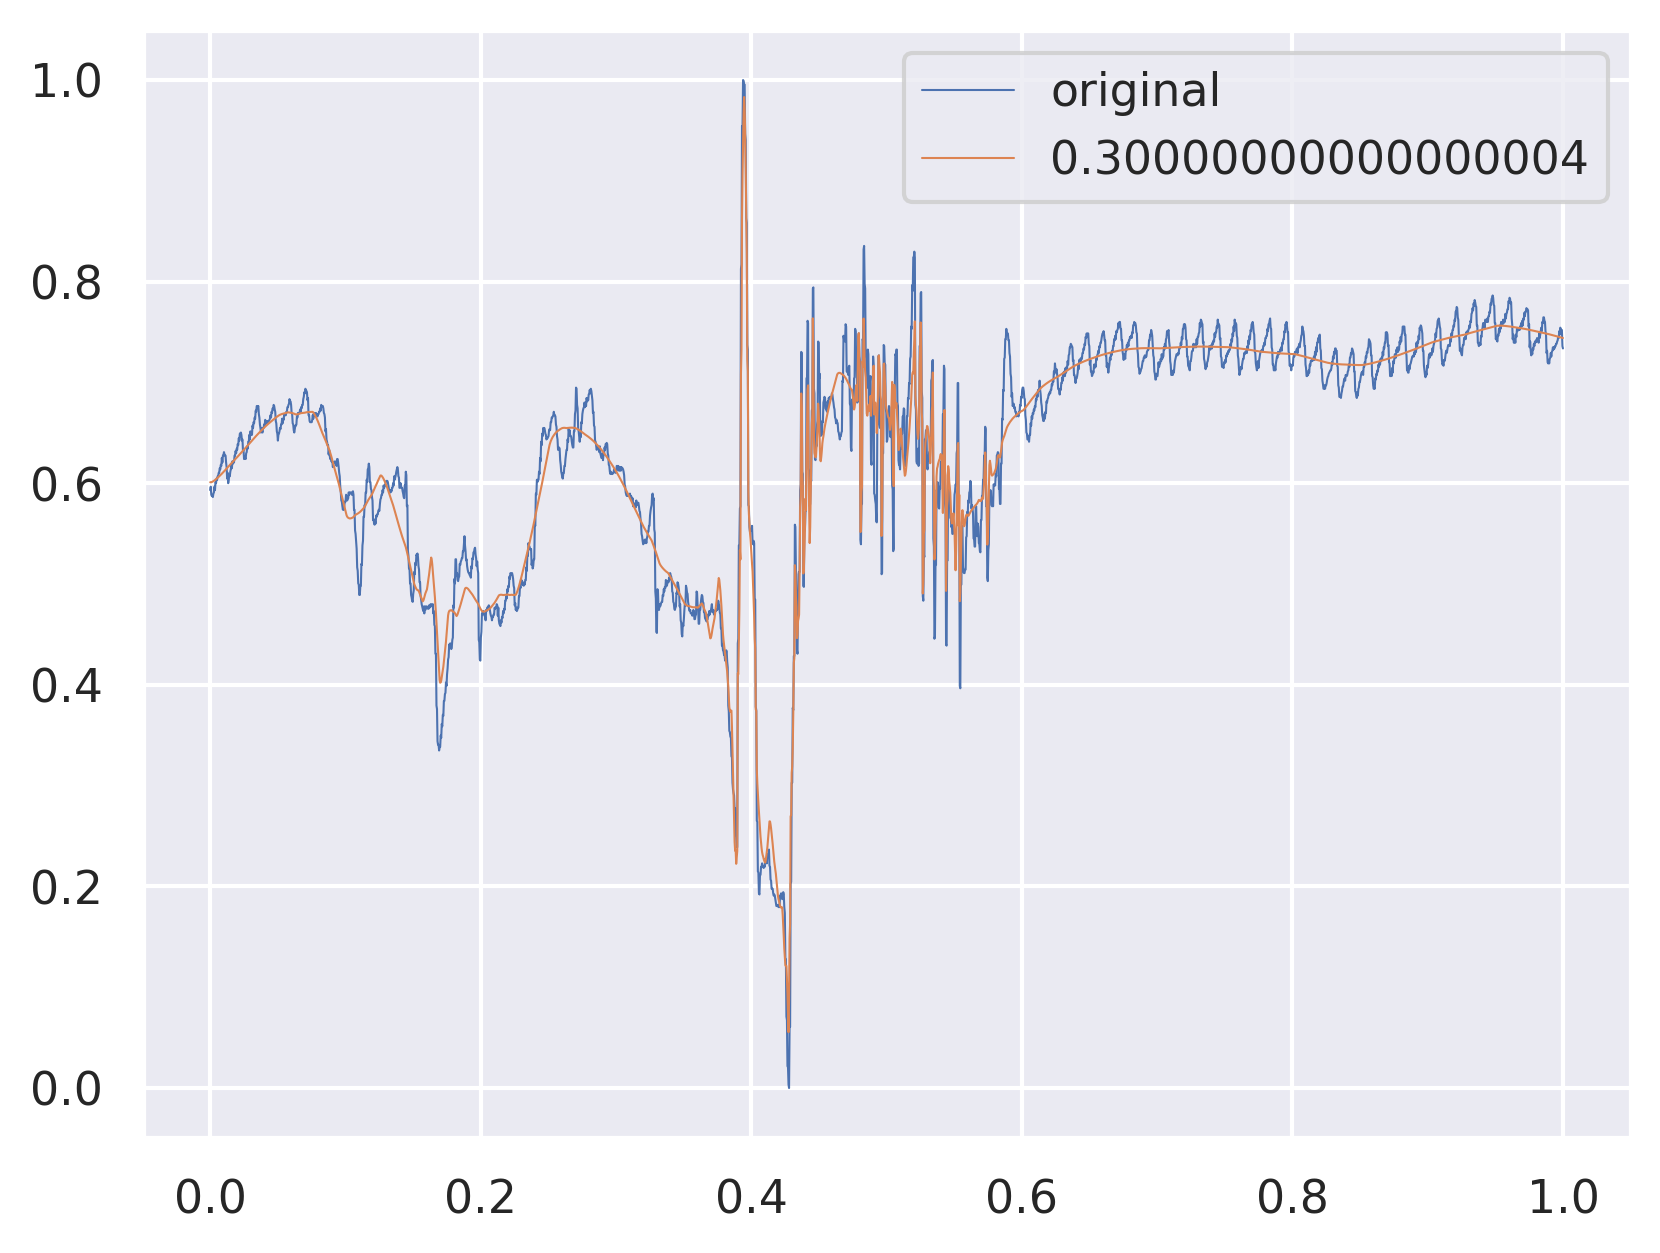

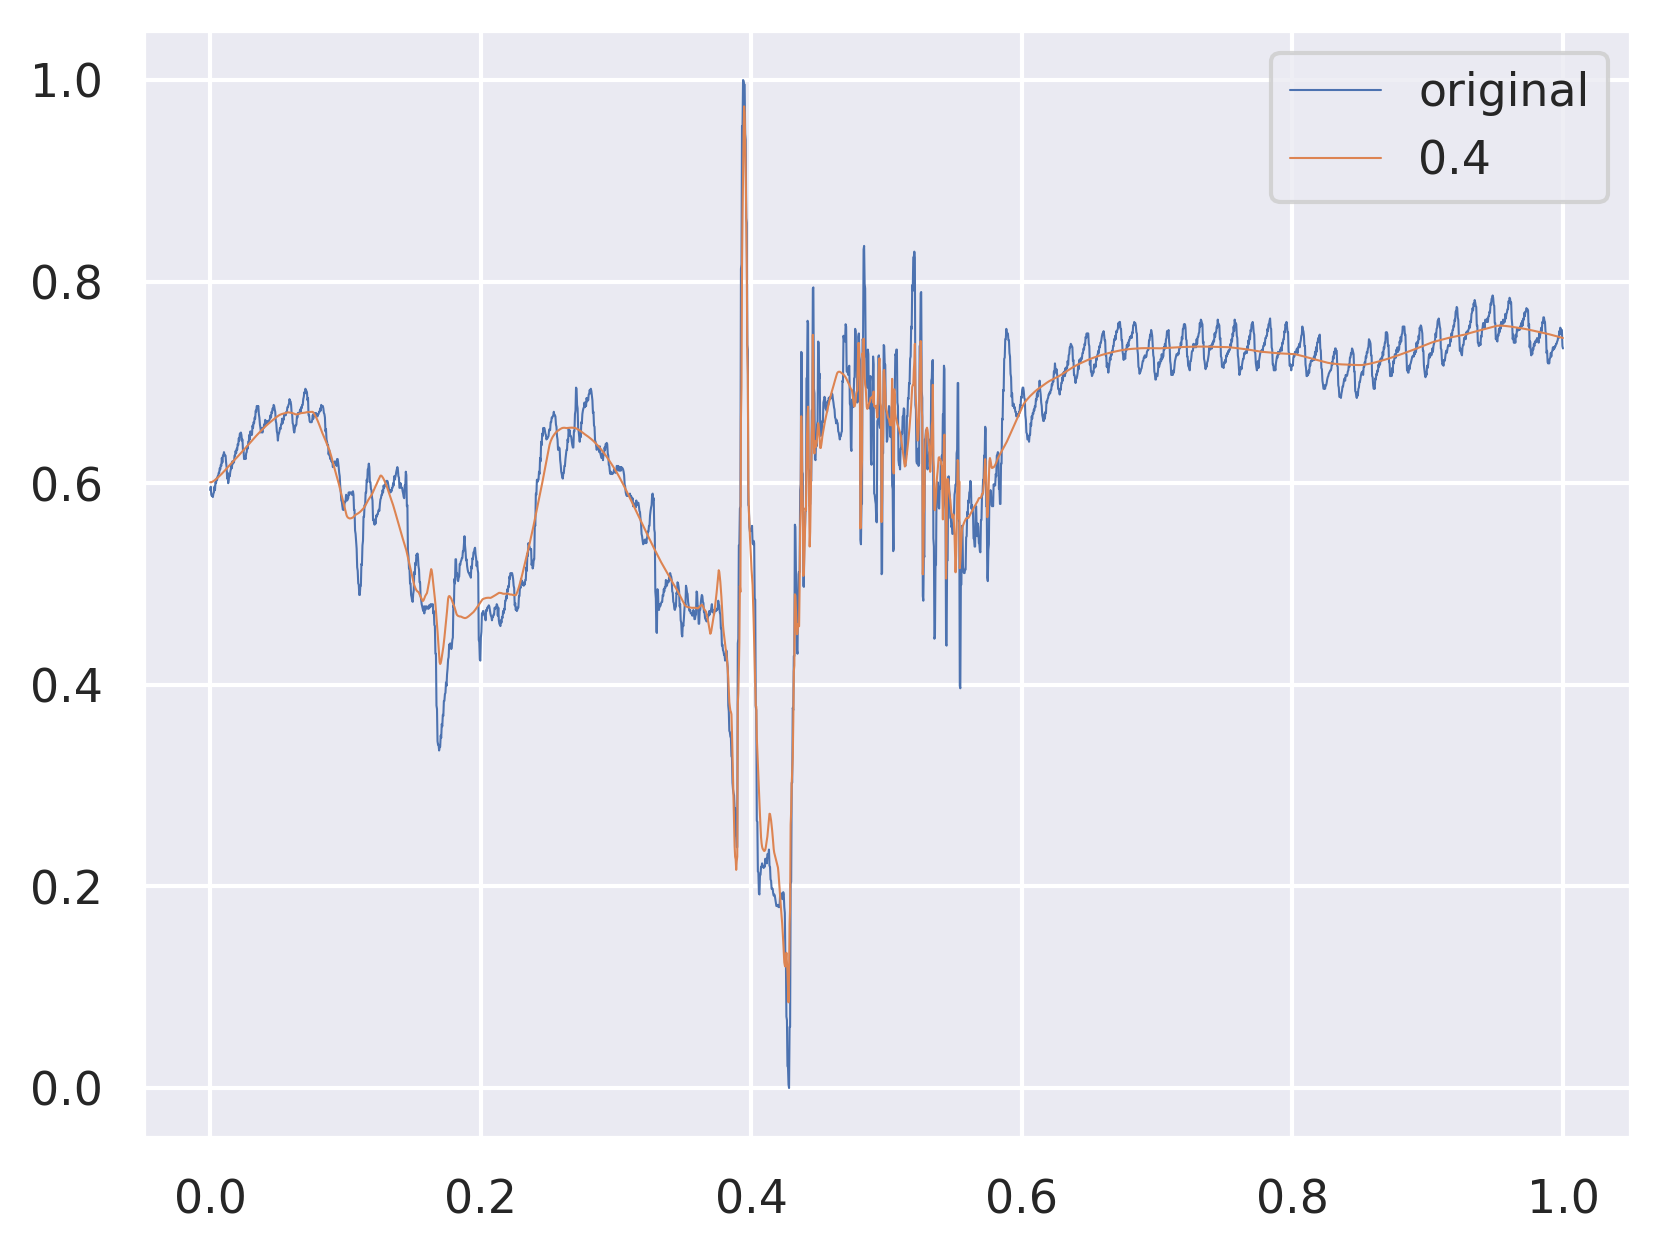

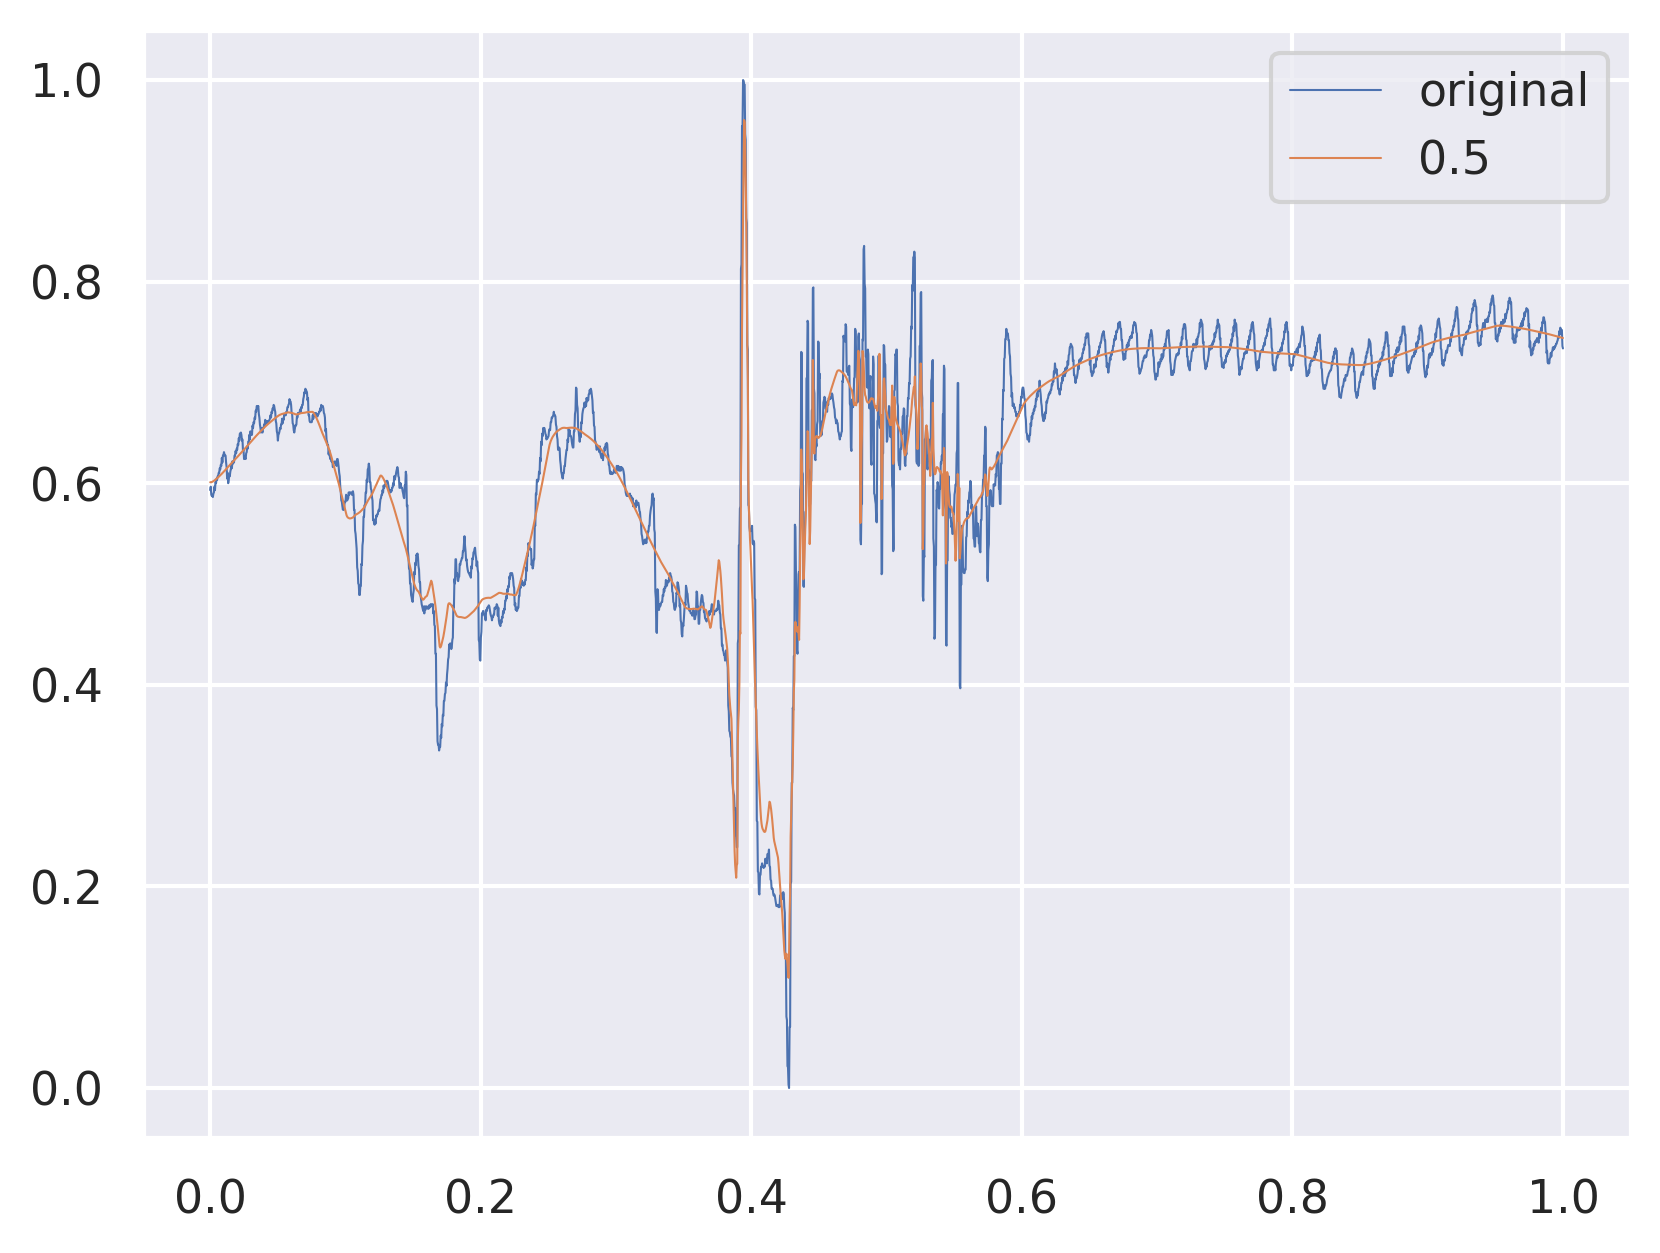

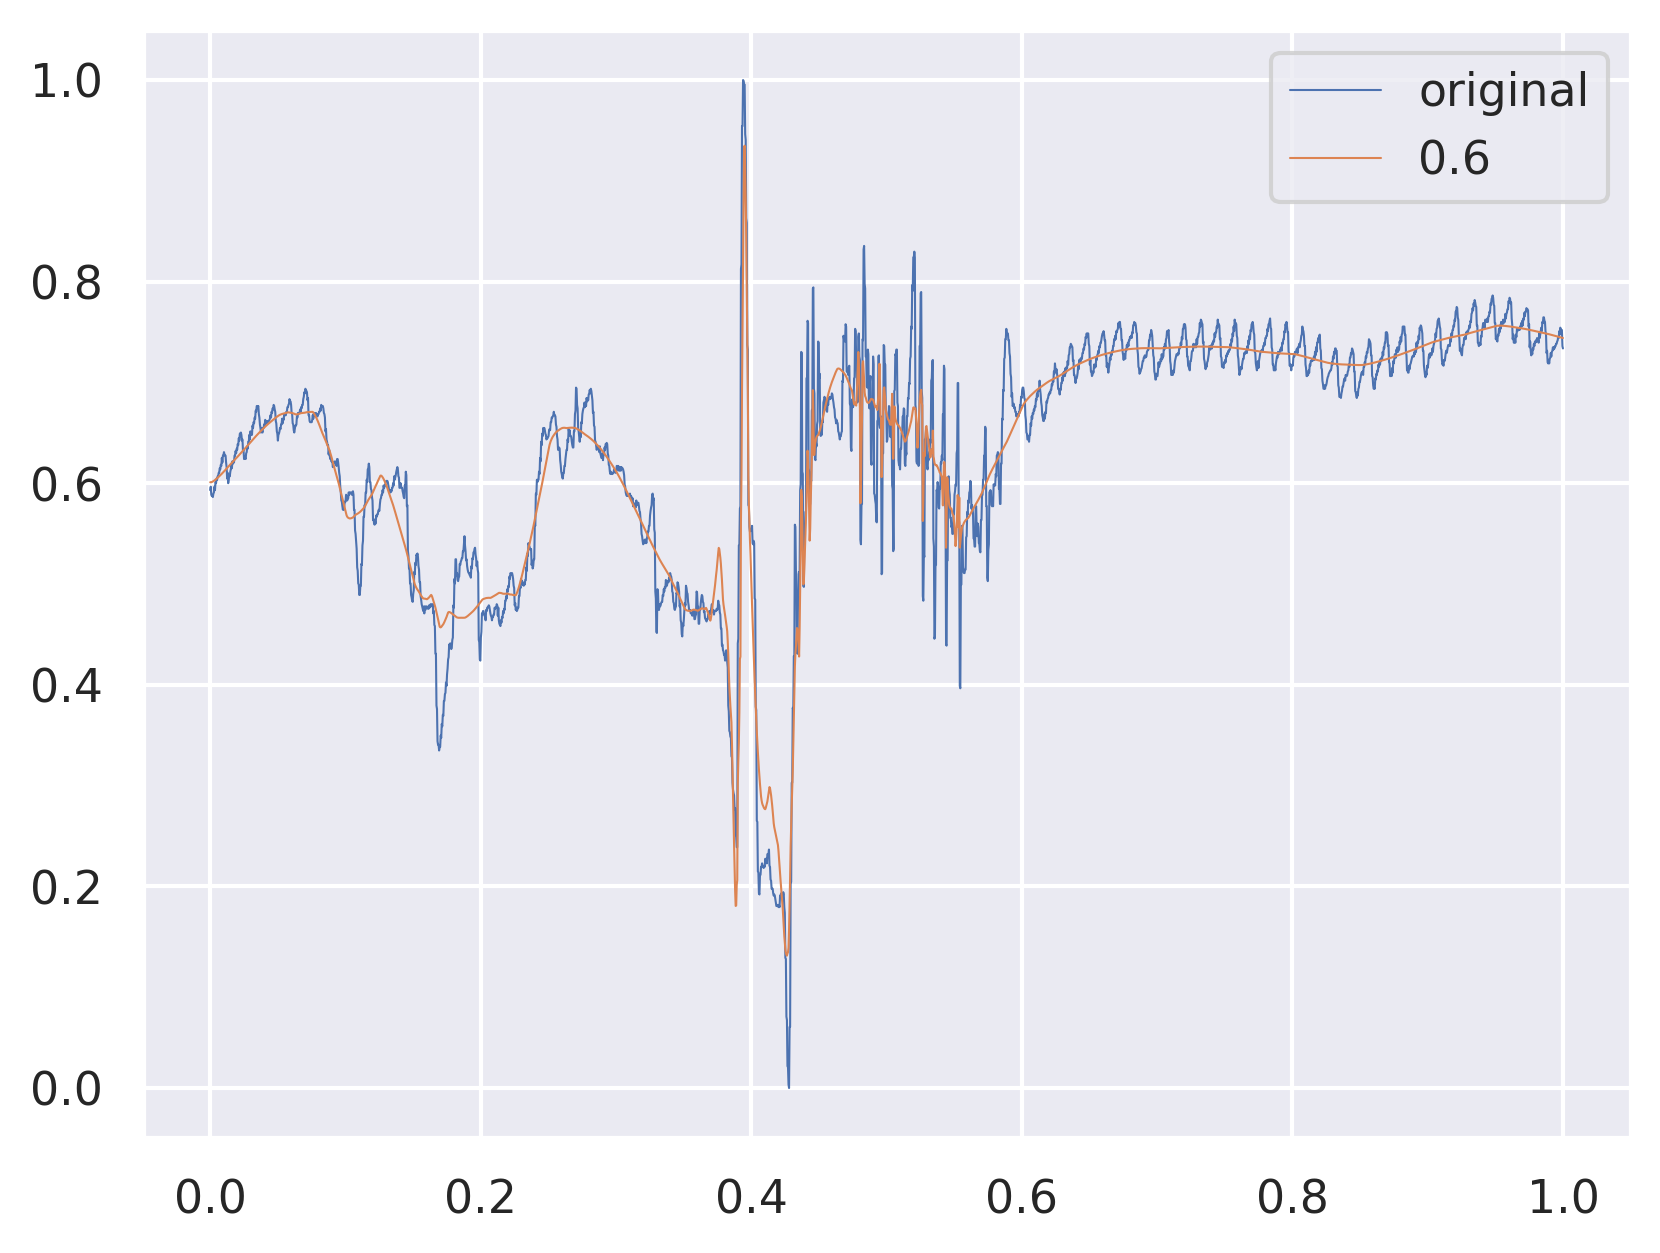

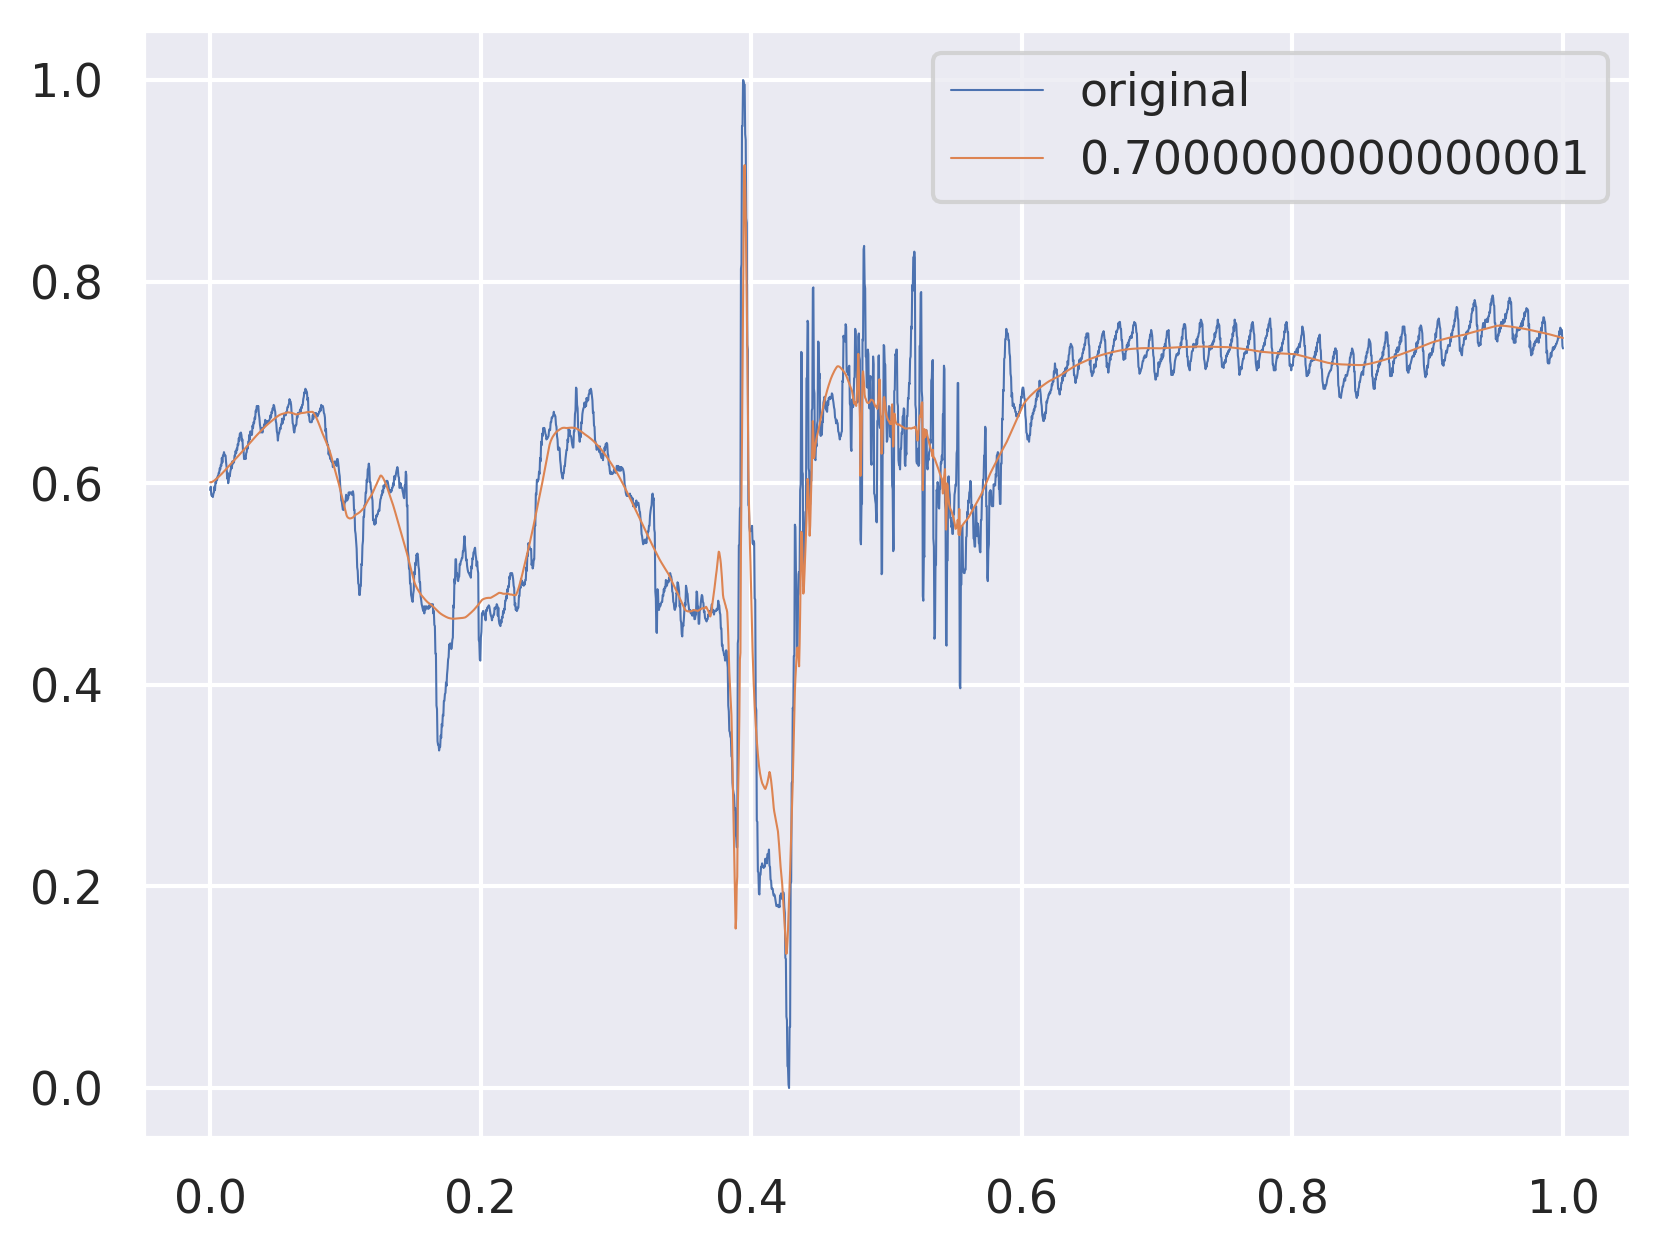

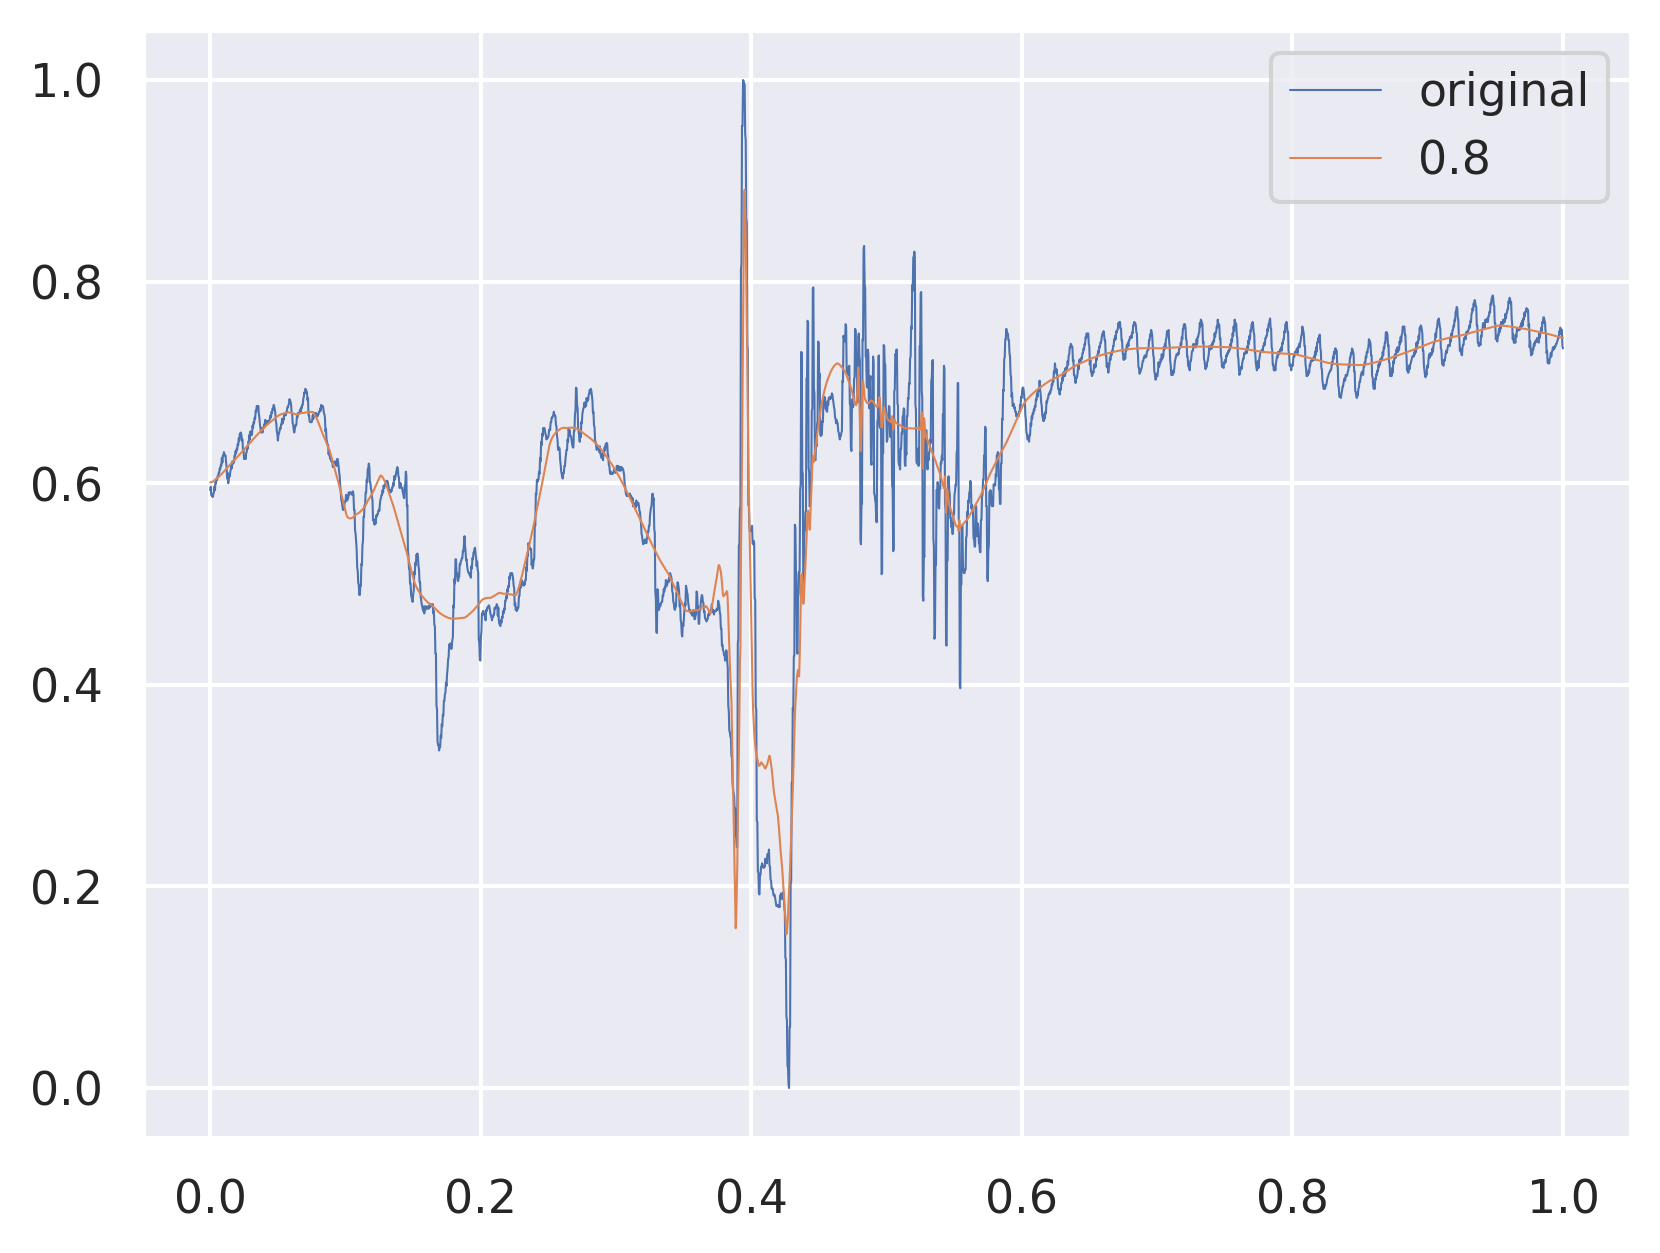

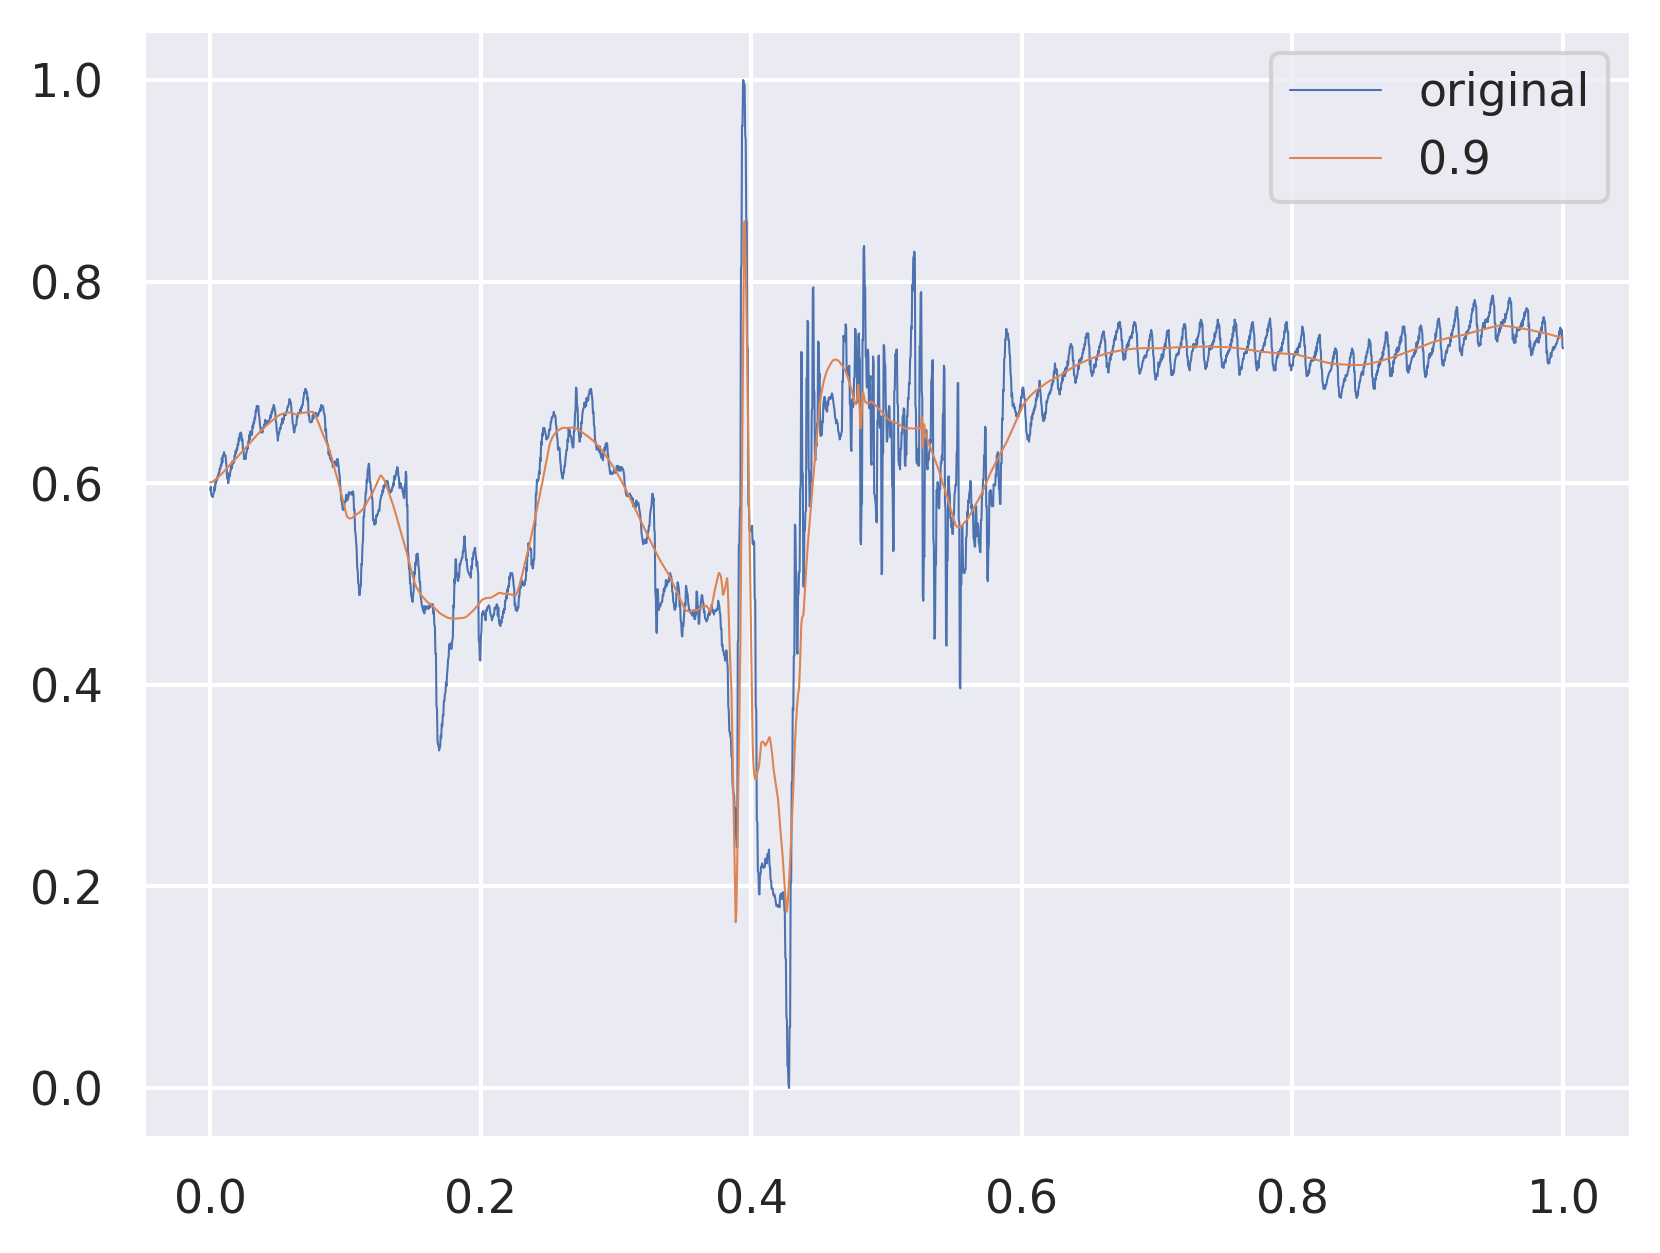

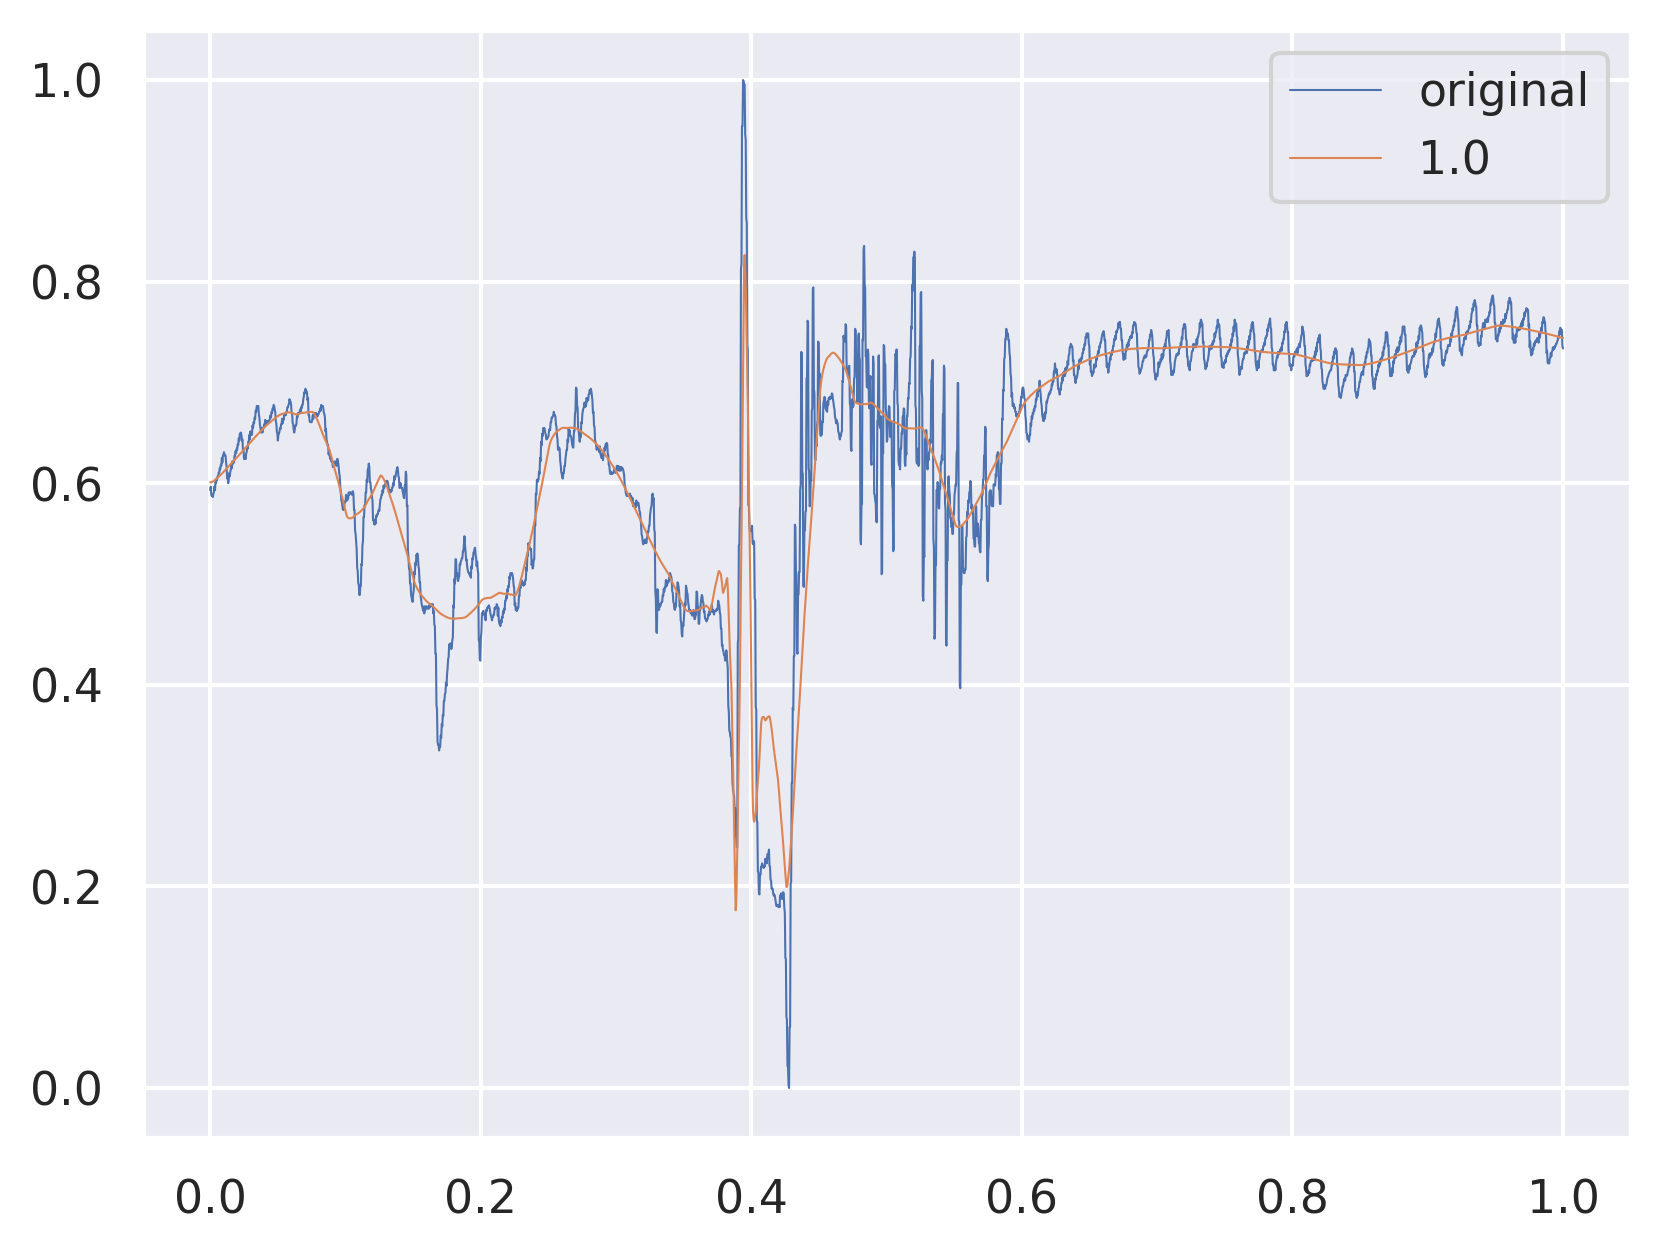

In [137]:
for param in np.linspace(0.1,1.0,10):
    cfs = coeffs.copy()
    
    for i in range(3, len(cfs)):
        # print(max(coeffs[i]))
        cfs[i] = pywt.threshold(cfs[i], param*np.max(cfs[i]), 'garrote')
    
    rec2 = pywt.waverec(cfs, 'sym4')
    min_max_scaler = preprocessing.MinMaxScaler().fit(df['red'].array.reshape(-1, 1))
    
    red = min_max_scaler.transform((df['red'].array.reshape(-1, 1)))
    rec2 = min_max_scaler.transform((rec2.reshape(-1, 1)))
    
    plt.figure()
    plt.plot(np.linspace(0, 1., num=len(red)), red, lw=0.5)
    plt.plot(np.linspace(0, 1., num=len(rec2)), rec2, lw=0.5)
    plt.legend(['original', param])

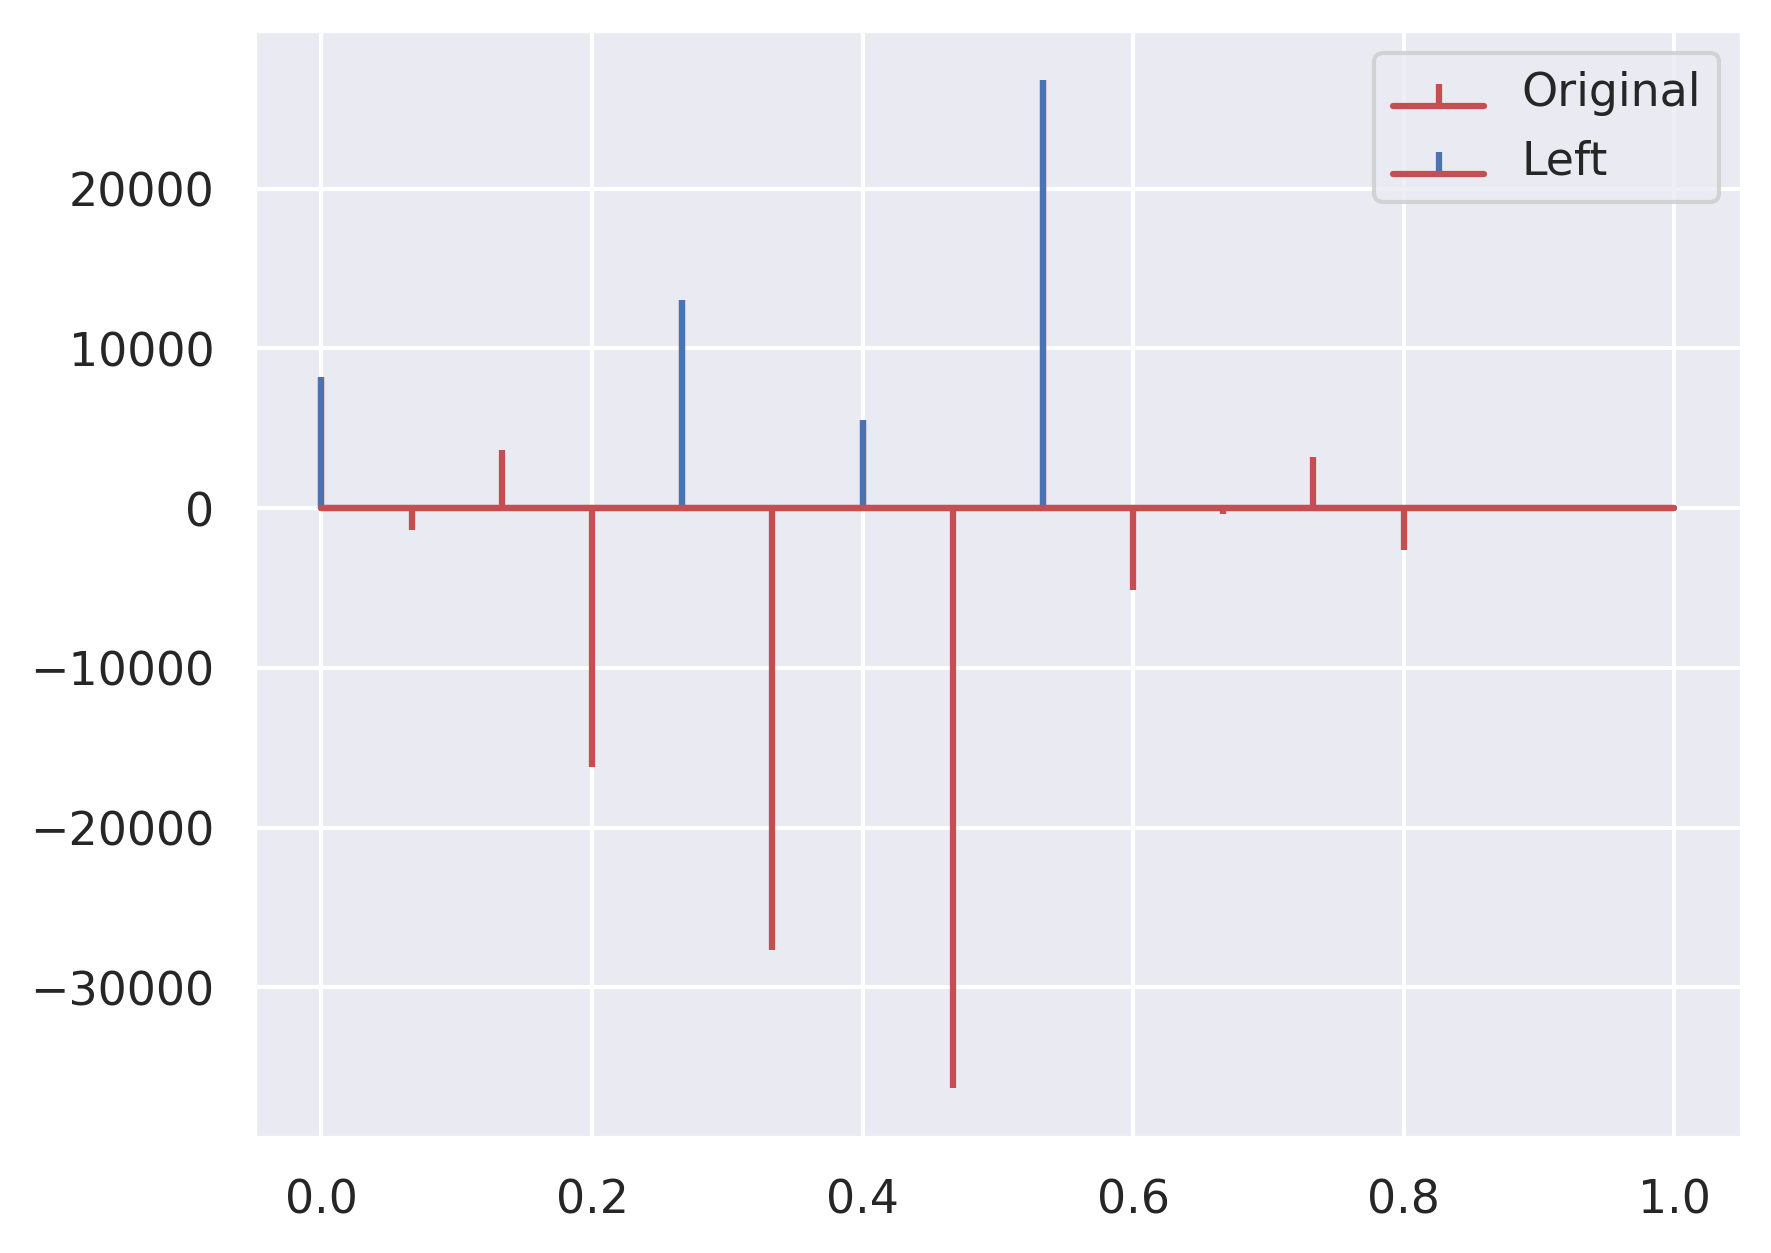

In [105]:
x = datarec
xmax = datarec.max()
coe = coeffs[1]
c = pywt.threshold(coe, 0.2*np.max(coe), 'greater')
plt.figure()
# reconstruction_stem(coe, xmax, markerfmt ='none', linefmt='r-')
reconstruction_stem(c, xmax, markerfmt ='none', linefmt='b-')
# plt.legend(['Original', 'Left'])

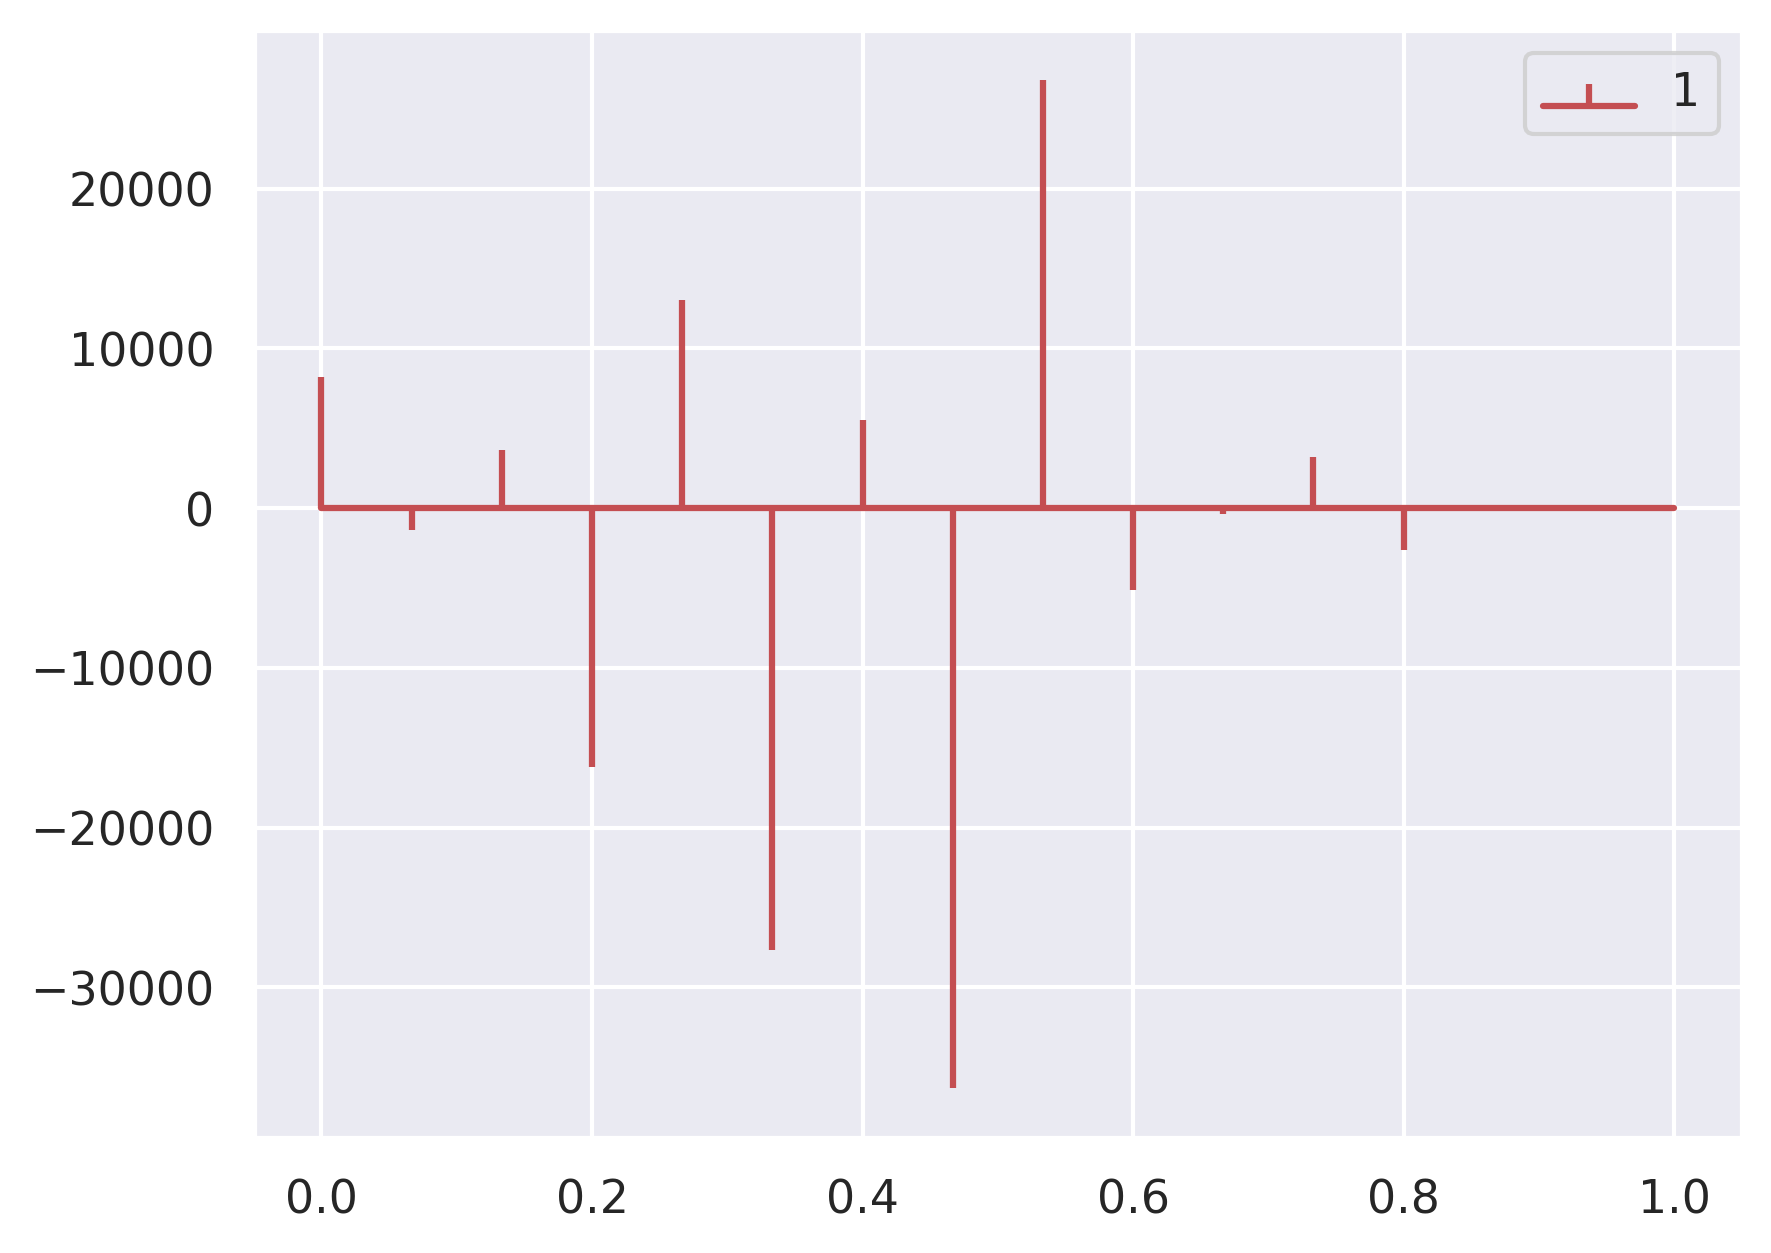

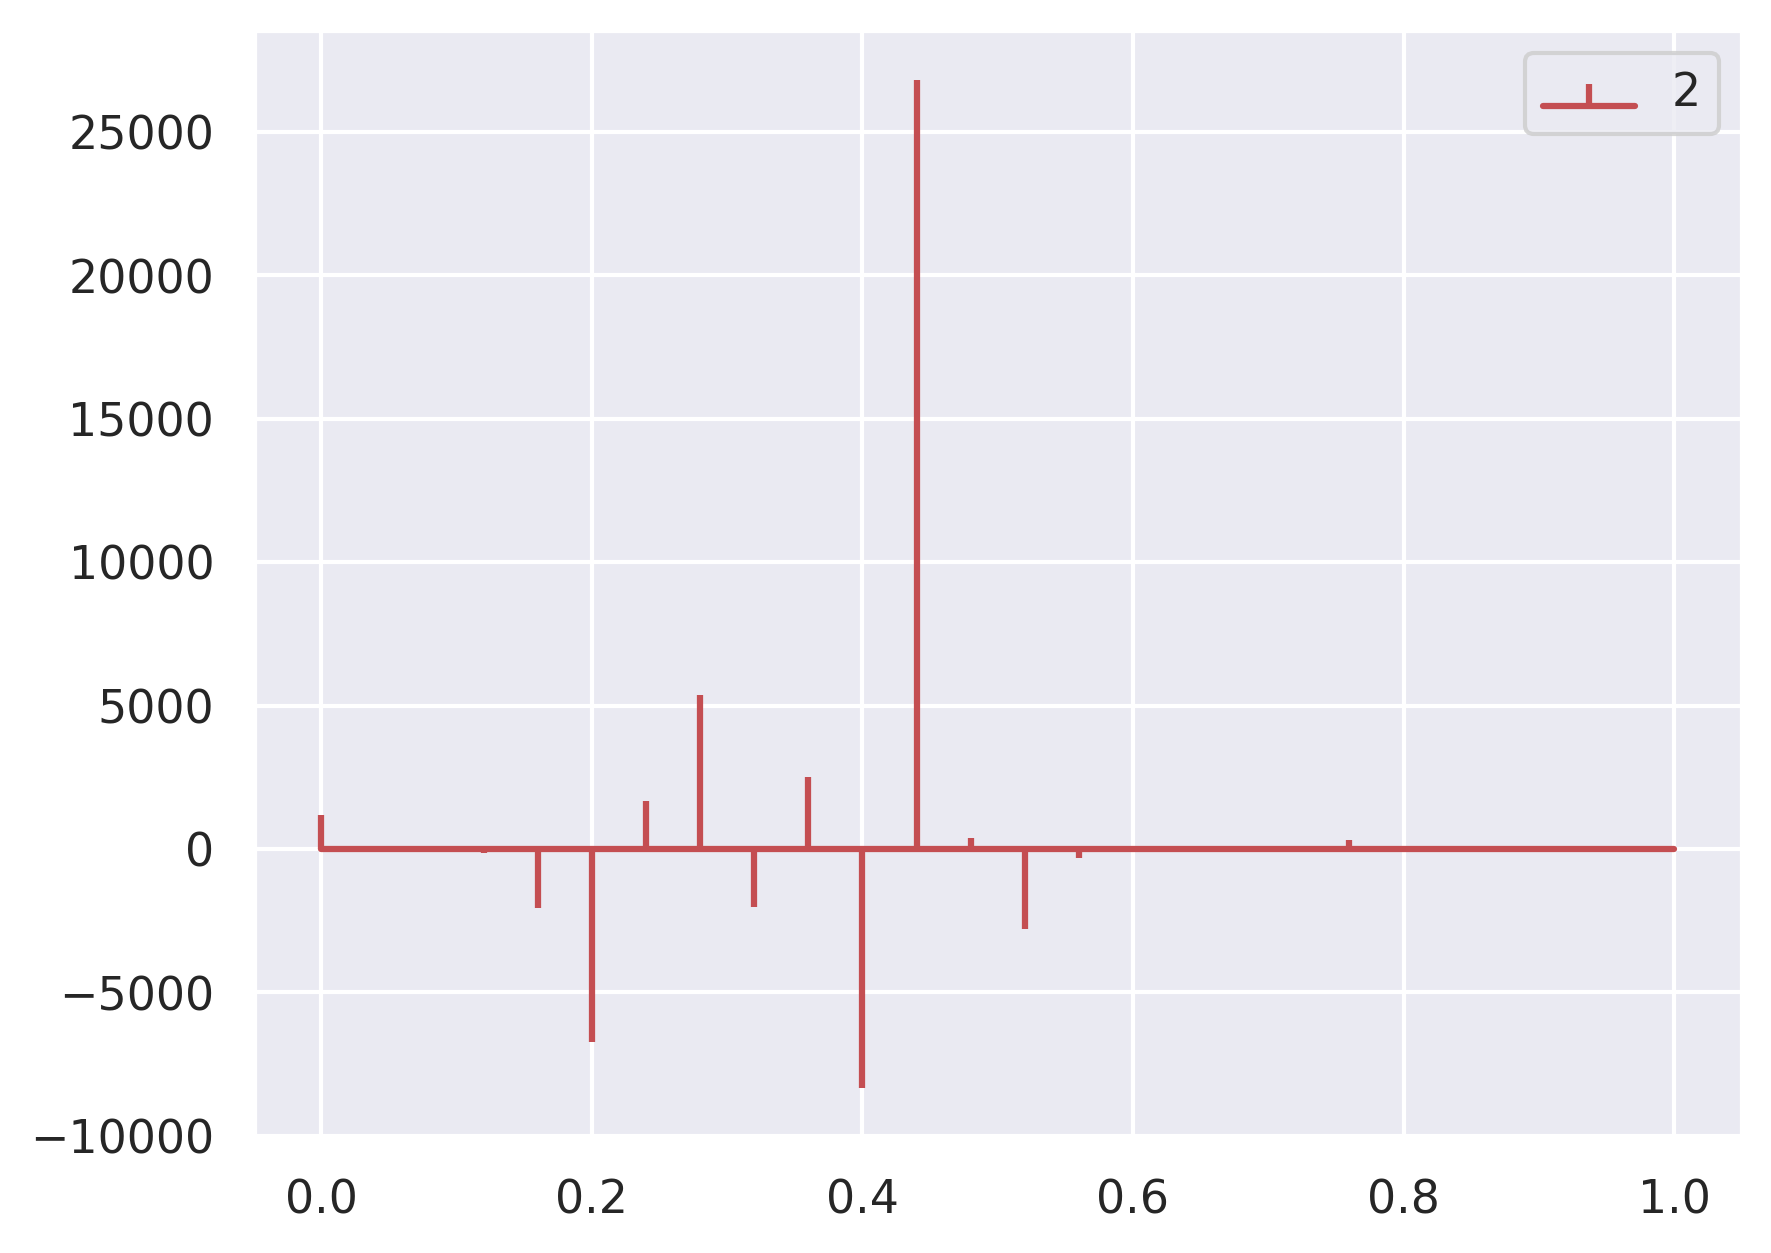

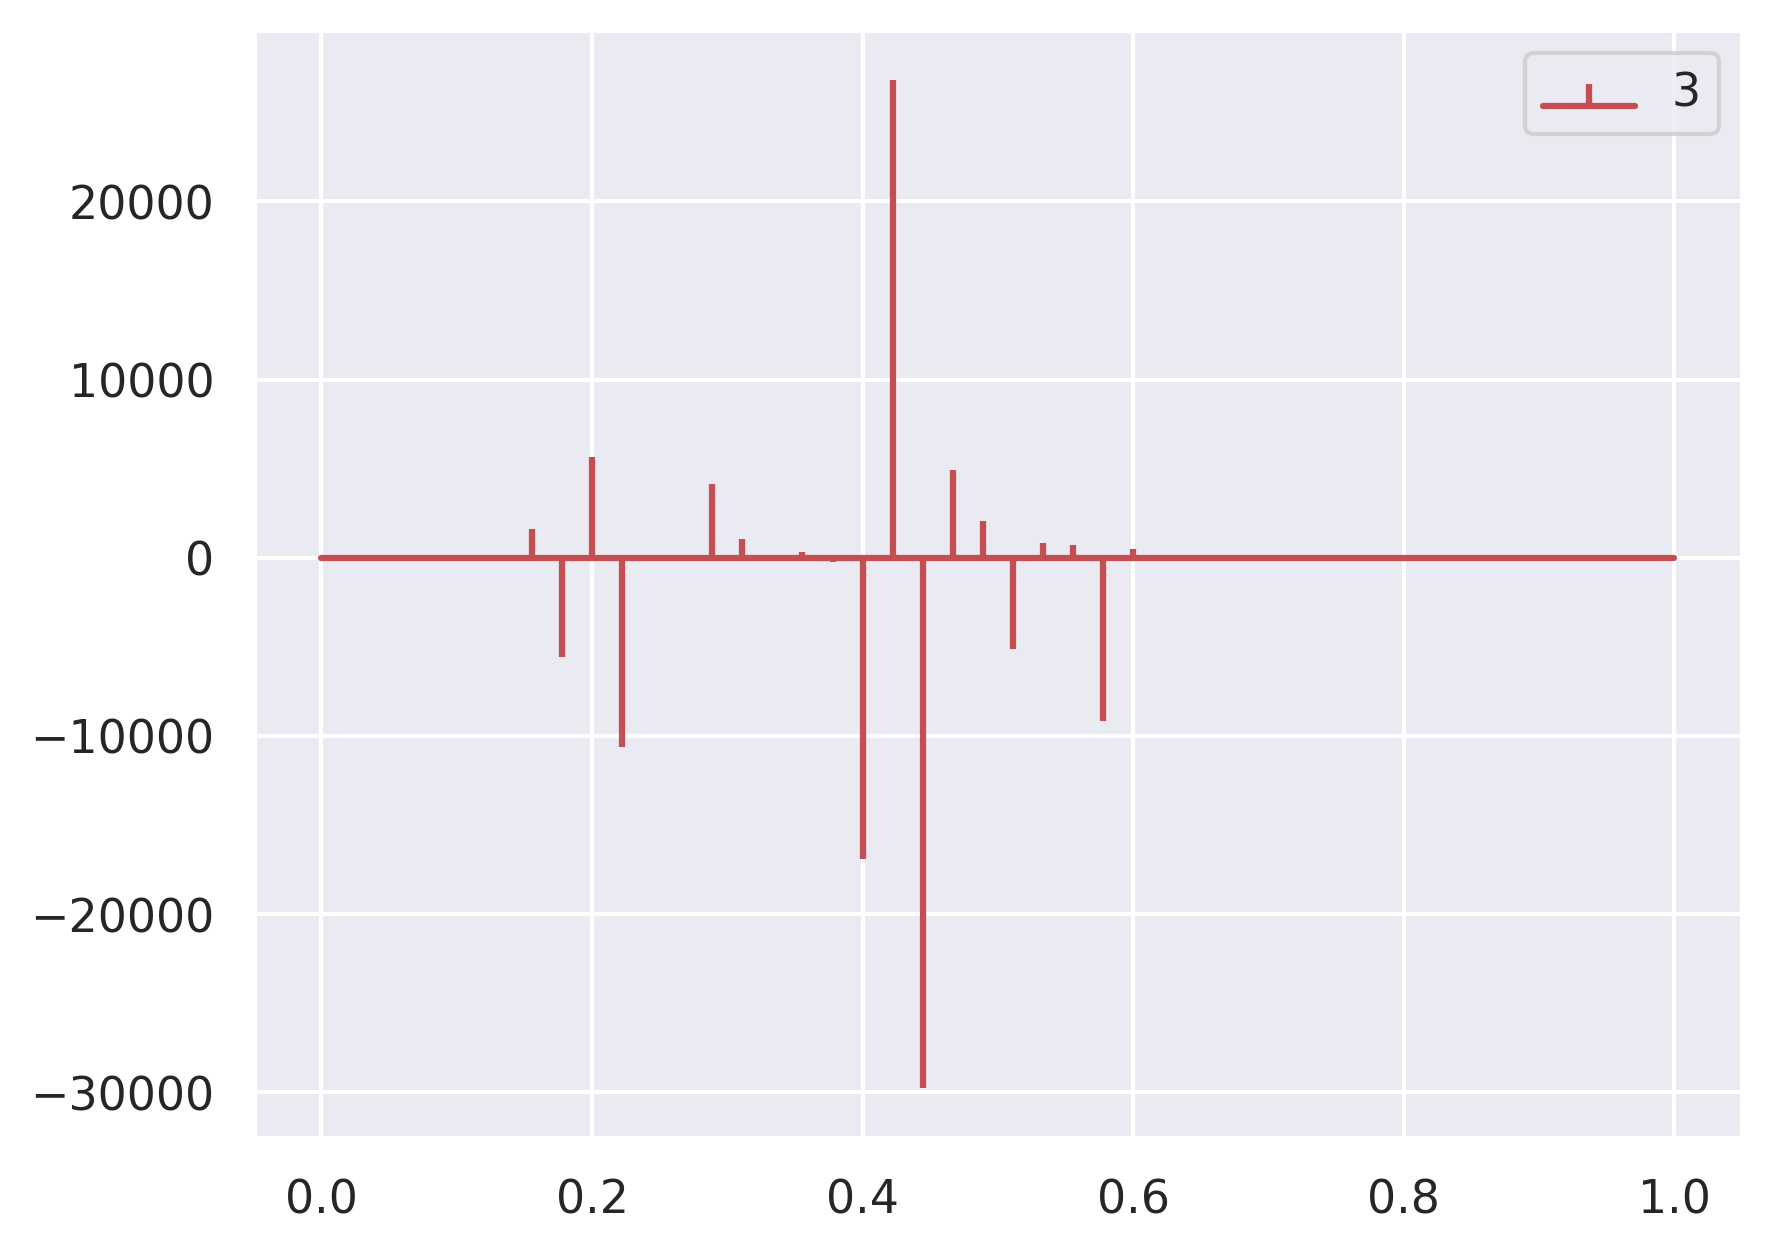

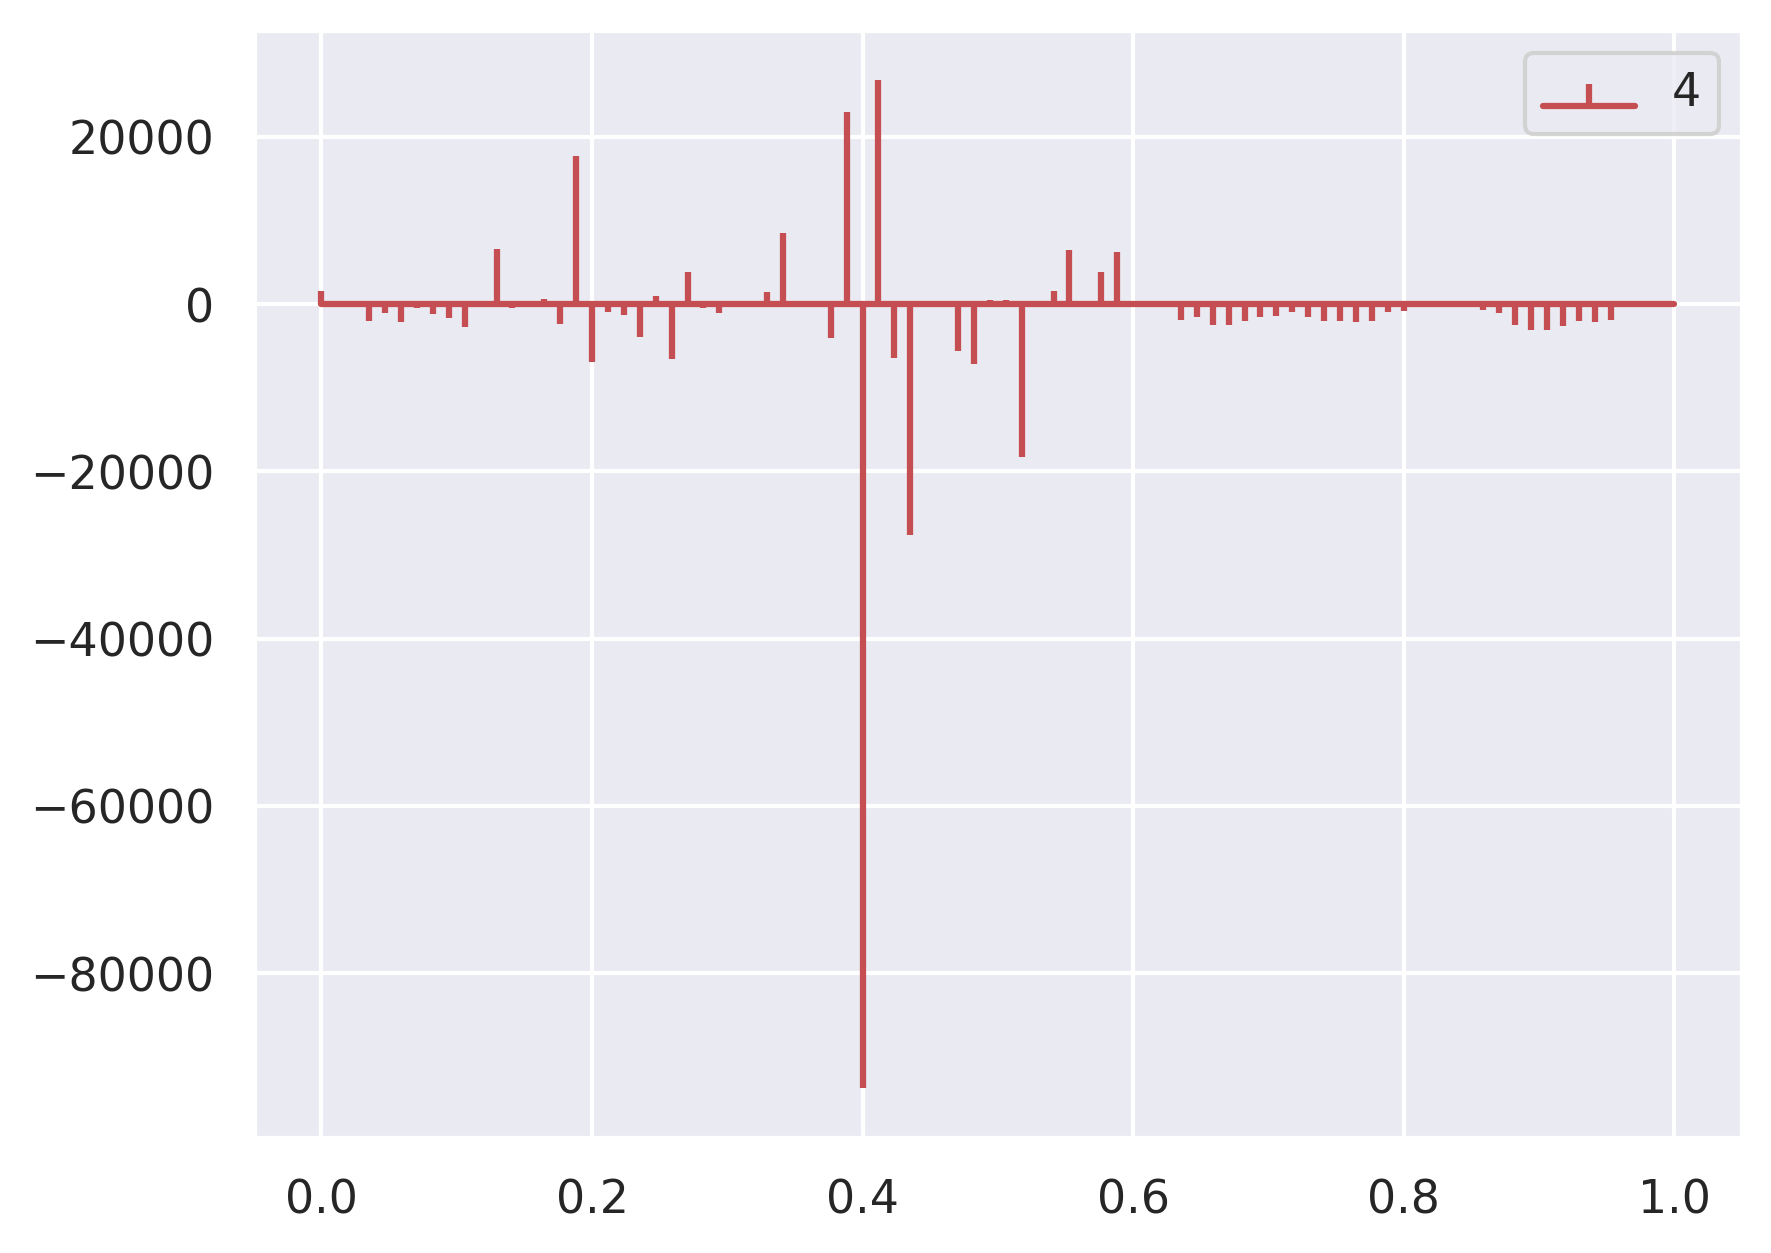

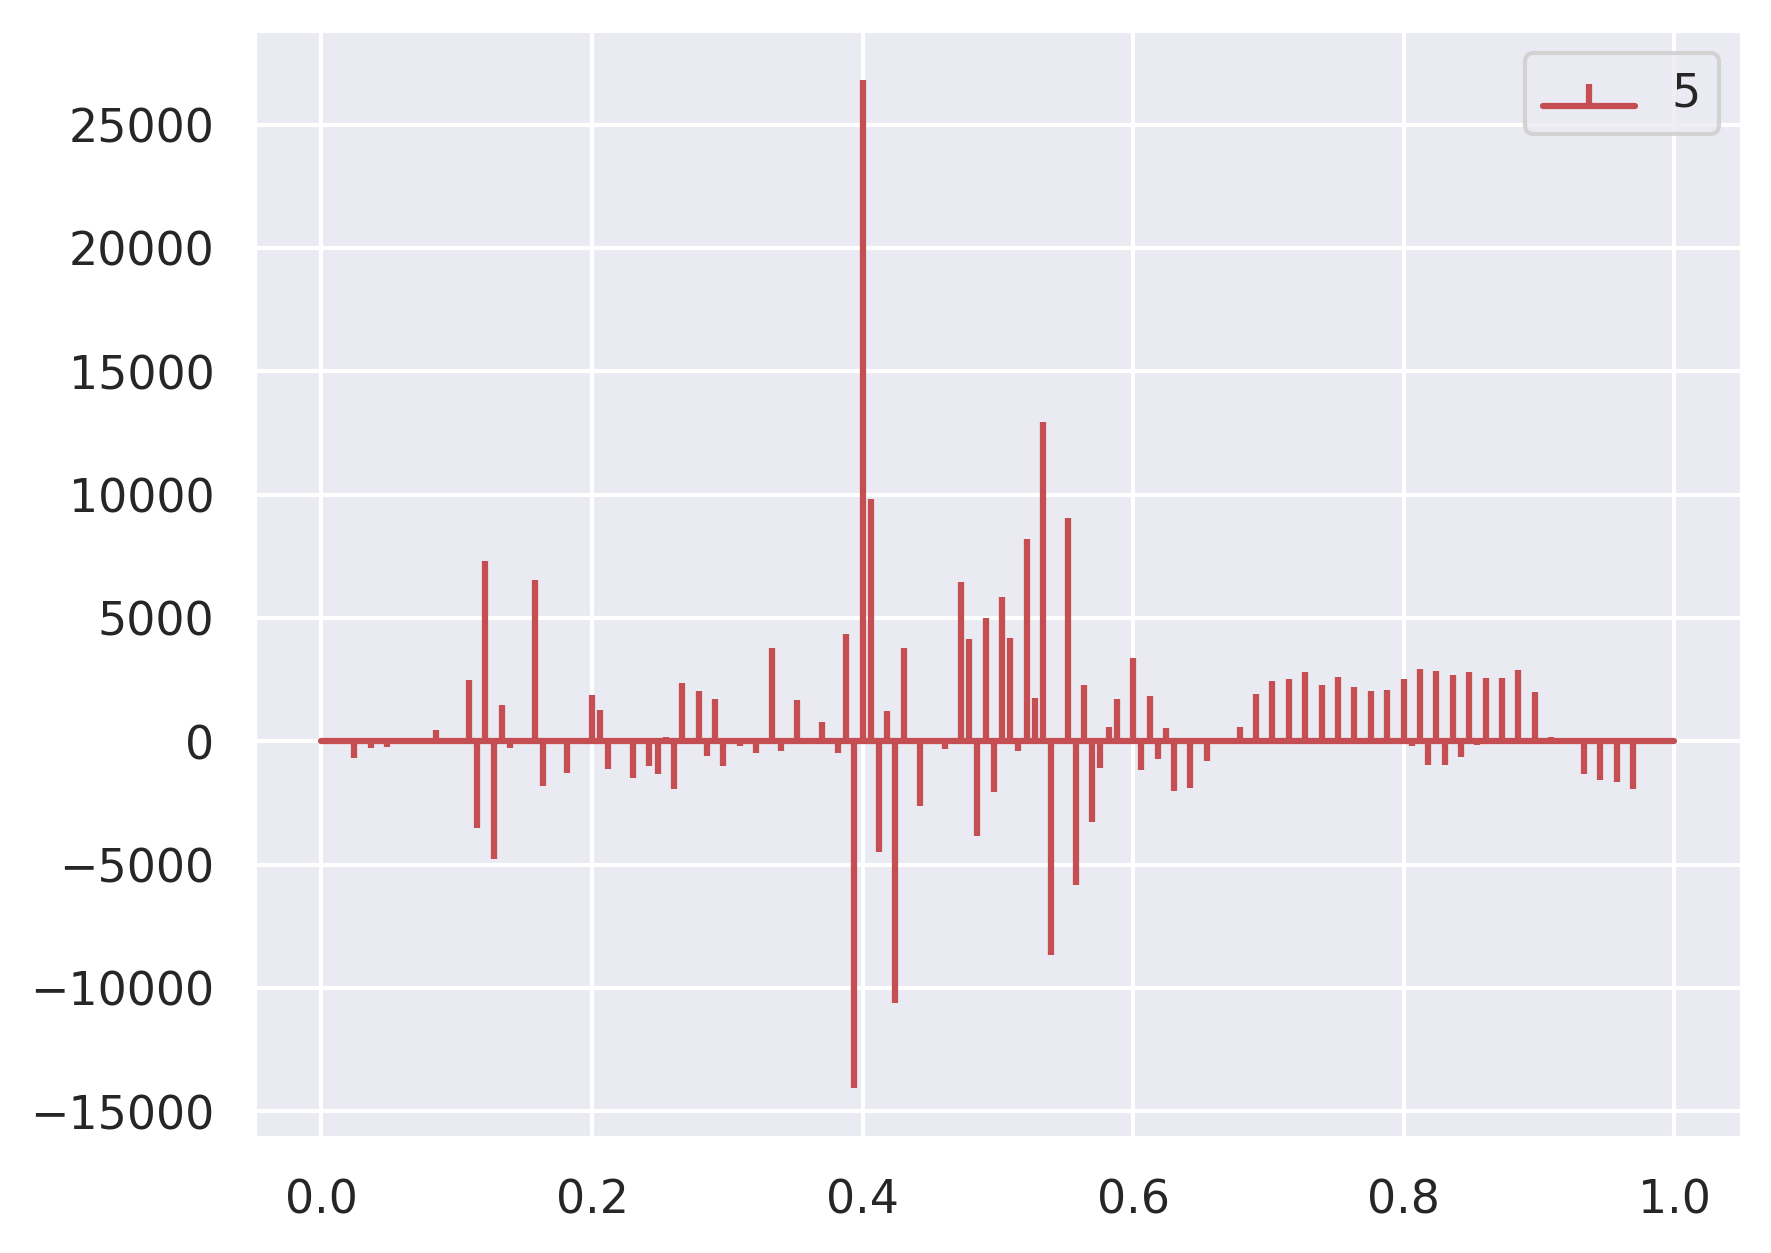

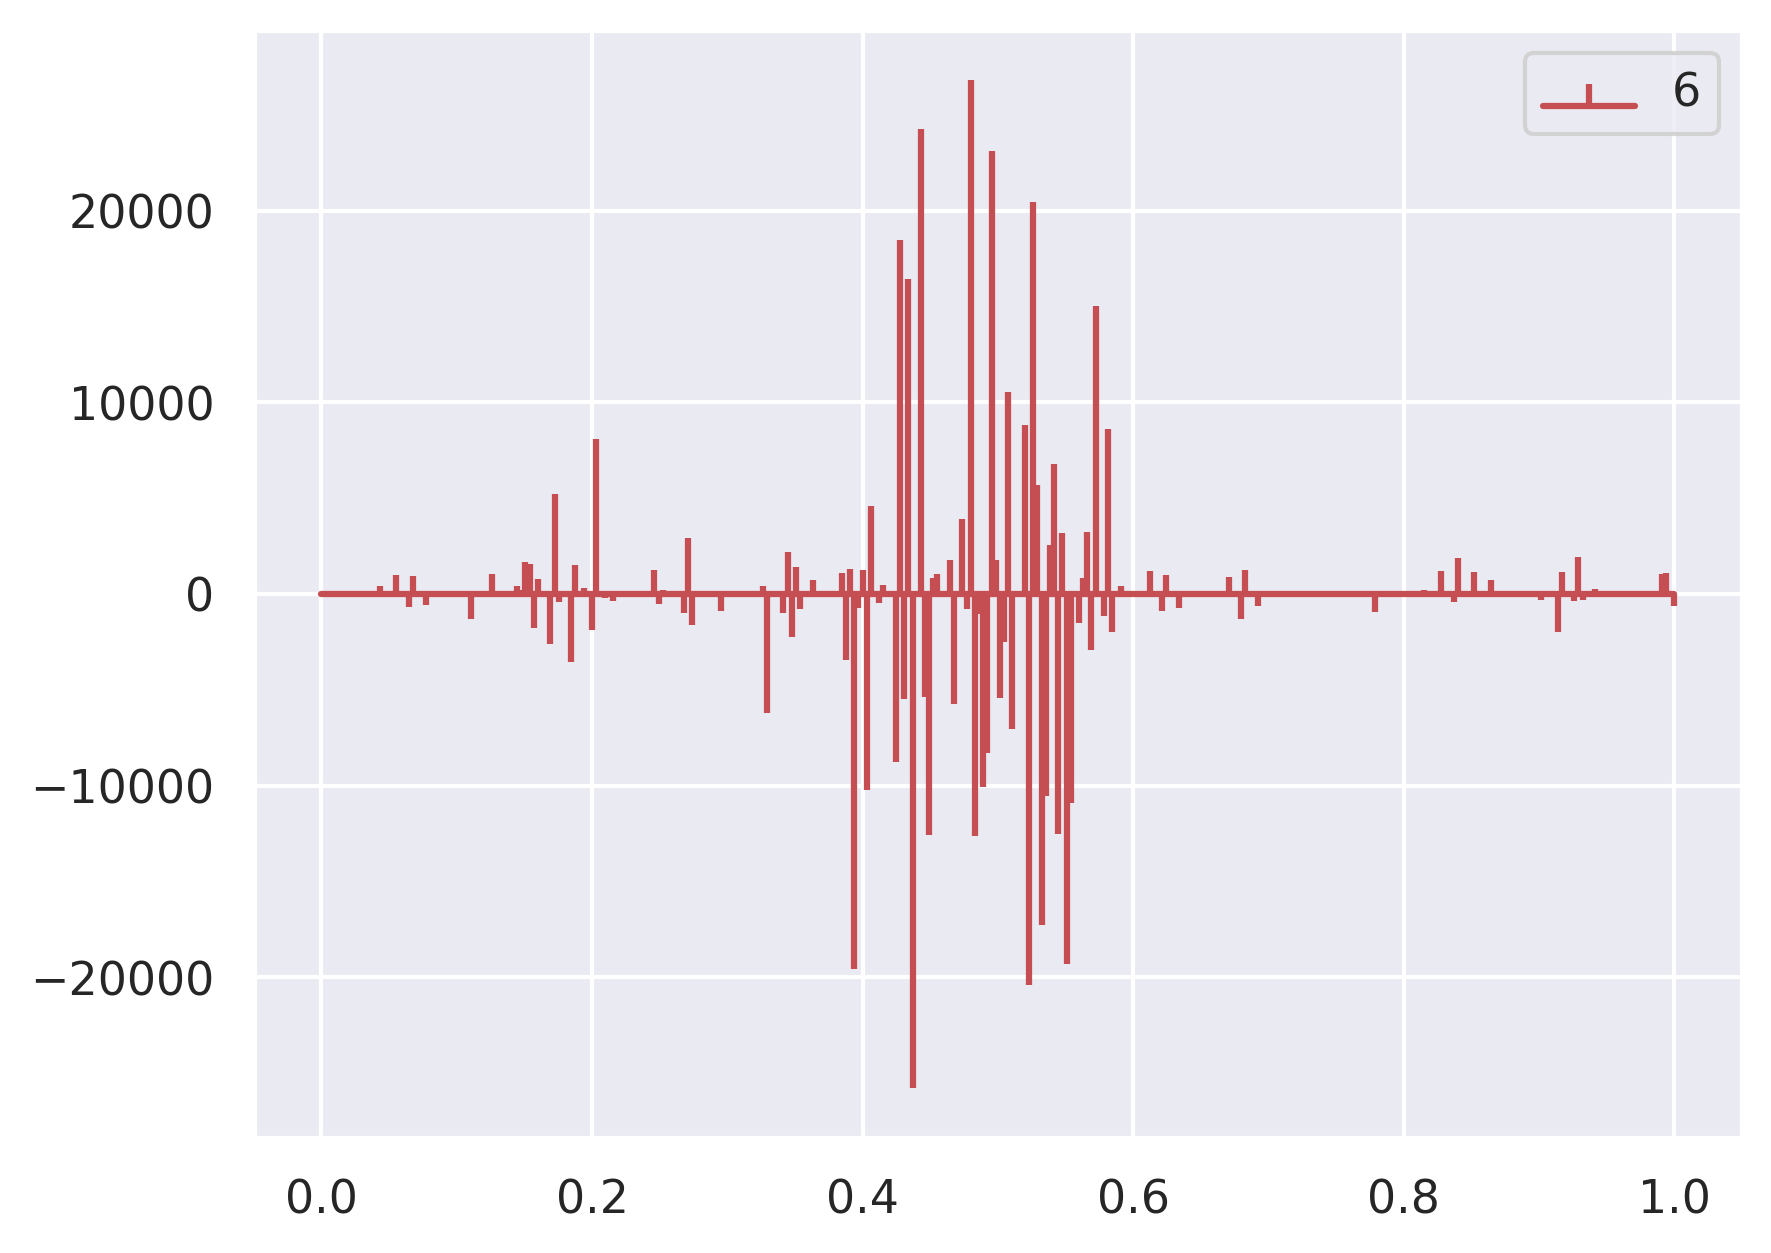

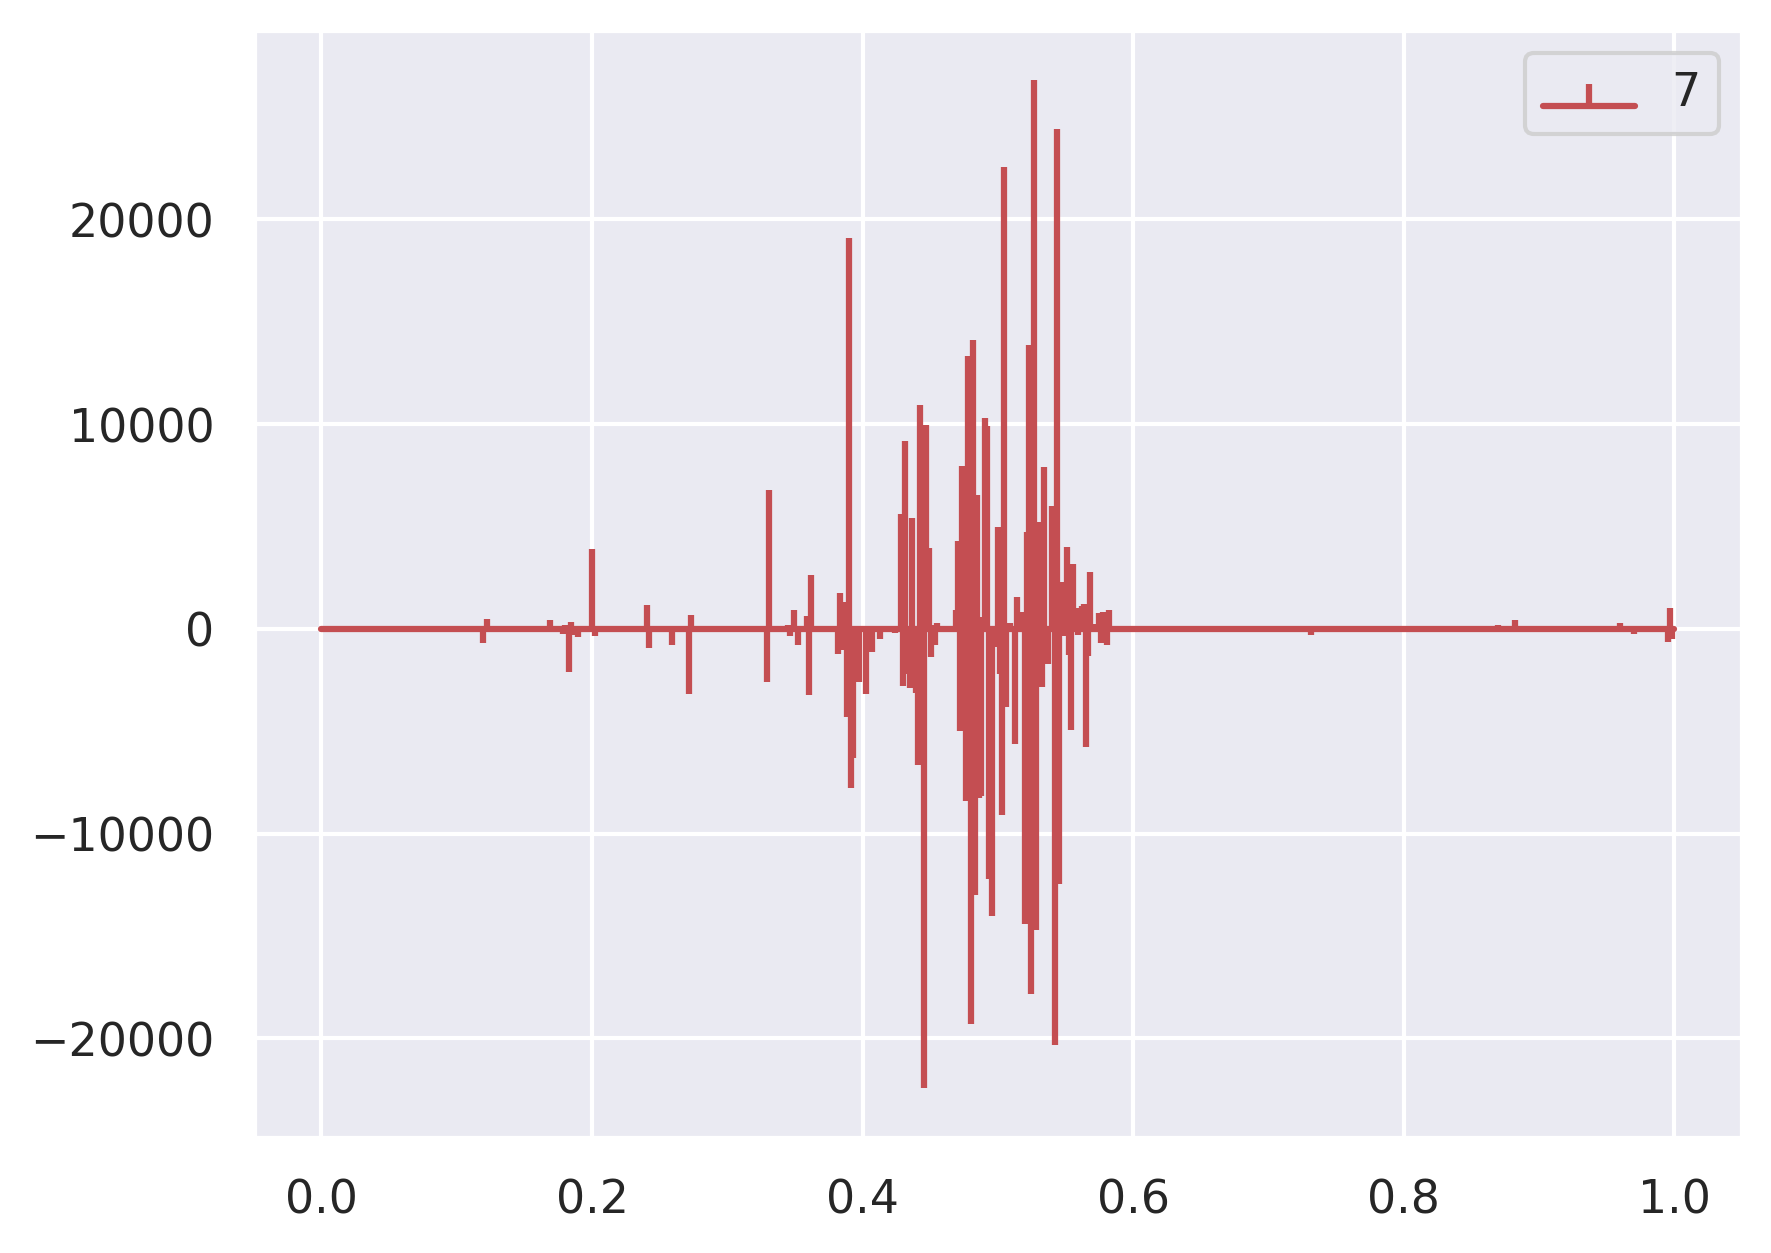

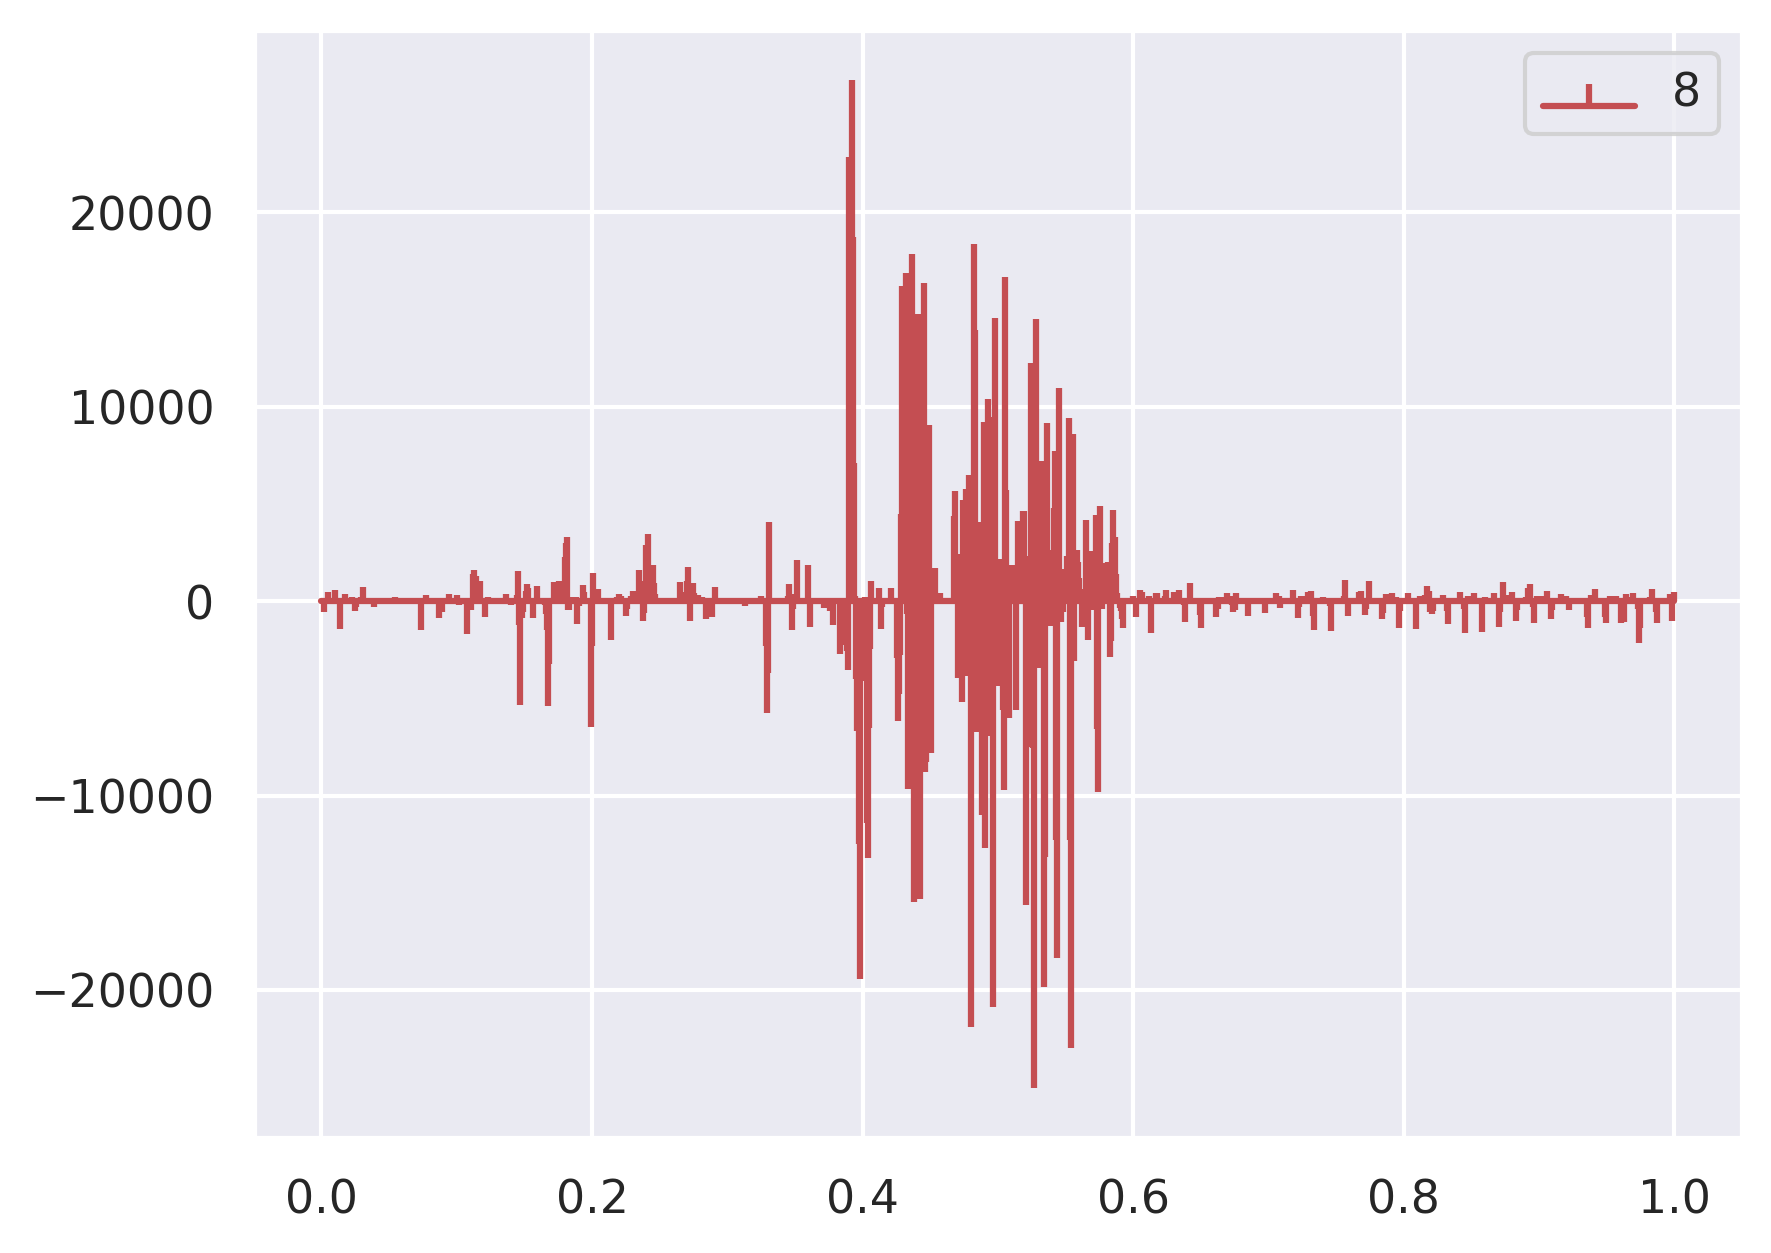

In [91]:
x = datarec
xmax = datarec.max()
nl = len(coeffs)-1
for i in range(nl):
    plt.figure()
    # reconstruction_plot(x, lw=0.5) # original signal 
    # reconstruction_plot(pywt.waverec(coeffs, w), lw=0.5) # full reconstruction 
    # reconstruction_plot(pywt.waverec(coeffs[:i+2] + [None] * (nl-i-1), w), lw=0.5) # partial reconstruction 
    reconstruction_stem(coeffs[i+1], xmax, markerfmt ='none', linefmt='r-')
    plt.legend([i+1])
    # plt.legend(['Original', 'Full reconstruction', ('Rec to lvl %d')%(nl-i), ('Details for lvl %d')%(nl-i)])
    # plt.legend(['Original', ('Rec to lvl %d')%(nl-i), ('Details for lvl %d')%(nl-i)])